In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Top_Trans_Pin

In [58]:
ttp=pd.read_csv("pulse-master/tables/top_trans_pin.csv")

In [59]:
ttp

,State,Year,Quarter,Pincode,Transaction_count,Transaction_amount
0,Andaman And Nicobar Islands,2020,2,744301.0,3,565.0
1,Andaman And Nicobar Islands,2020,2,744104.0,2,513.0
2,Andaman And Nicobar Islands,2020,2,744101.0,1,282.0
3,Andaman And Nicobar Islands,2020,3,744112.0,9,3432.0
4,Andaman And Nicobar Islands,2020,3,744105.0,7,3948.0
...,...,...,...,...,...,...
5596,West Bengal,2024,1,700039.0,563,736083.0
5597,West Bengal,2024,1,700015.0,558,744878.0
5598,West Bengal,2024,1,700006.0,516,699258.0
5599,West Bengal,2024,1,721301.0,507,592231.0


In [60]:
ttp.head()

,State,Year,Quarter,Pincode,Transaction_count,Transaction_amount
0,Andaman And Nicobar Islands,2020,2,744301.0,3,565.0
1,Andaman And Nicobar Islands,2020,2,744104.0,2,513.0
2,Andaman And Nicobar Islands,2020,2,744101.0,1,282.0
3,Andaman And Nicobar Islands,2020,3,744112.0,9,3432.0
4,Andaman And Nicobar Islands,2020,3,744105.0,7,3948.0


In [61]:
ttp.shape

(5601, 6)

In [63]:
ttp["Pincode"]=ttp["Pincode"].astype(float)

In [64]:
ttp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5601 entries, 0 to 5600
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               5601 non-null   object 
 1   Year                5601 non-null   int64  
 2   Quarter             5601 non-null   int64  
 3   Pincode             5598 non-null   float64
 4   Transaction_count   5601 non-null   int64  
 5   Transaction_amount  5601 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 262.7+ KB


In [65]:
ttp.describe()

,Year,Quarter,Pincode,Transaction_count,Transaction_amount
count,5601.000000,5601.000000,5598.000000,5601.000000,5.601000e+03
mean,2021.760043,2.500803,517641.459093,307.681843,3.680896e+05
std,1.195789,1.119650,247916.777289,437.536928,5.915060e+05
min,2020.000000,1.000000,110006.000000,1.000000,3.100000e+01
25%,2021.000000,1.000000,263139.000000,28.000000,2.960100e+04
50%,2022.000000,3.000000,524004.000000,140.000000,1.329890e+05
75%,2023.000000,4.000000,781017.000000,395.000000,4.393140e+05
max,2024.000000,4.000000,854301.000000,3947.000000,5.672343e+06


In [66]:
ttp.isnull().sum()

State                 0
Year                  0
Quarter               0
Pincode               3
Transaction_count     0
Transaction_amount    0
dtype: int64

In [67]:
ttp.duplicated().sum()

0

Data Cleaning

In [68]:
nan_rows=ttp[ttp.isna().any(axis=1)]
nan_rows

,State,Year,Quarter,Pincode,Transaction_count,Transaction_amount
2691,Ladakh,2020,3,NaN,1,281.0
2699,Ladakh,2020,4,NaN,1,658.0
2776,Ladakh,2022,4,NaN,8,16020.0


In [69]:
ladakh_pincodes=ttp[ttp["State"]=="Ladakh"]["Pincode"]
ladakh_pincodes.value_counts()

Pincode
194104.0    16
194101.0    16
194201.0    15
194703.0    14
194105.0    14
194103.0    14
194102.0    14
194401.0    14
194107.0    13
194109.0     8
194404.0     7
194106.0     5
194301.0     2
Name: count, dtype: int64

In [70]:
ttp["Pincode"]=ttp["Pincode"].fillna("194101")

In [71]:
ttp["Pincode"]=ttp["Pincode"].astype(int).astype(str)

In [72]:
ttp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5601 entries, 0 to 5600
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               5601 non-null   object 
 1   Year                5601 non-null   int64  
 2   Quarter             5601 non-null   int64  
 3   Pincode             5601 non-null   object 
 4   Transaction_count   5601 non-null   int64  
 5   Transaction_amount  5601 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 262.7+ KB


In [17]:
ttp["Pincode"]

0       744301
1       744104
2       744101
3       744112
4       744105
         ...  
5596    700039
5597    700015
5598    700006
5599    721301
5600    700091
Name: Pincode, Length: 5601, dtype: object

In [73]:
ttp

,State,Year,Quarter,Pincode,Transaction_count,Transaction_amount
0,Andaman And Nicobar Islands,2020,2,744301,3,565.0
1,Andaman And Nicobar Islands,2020,2,744104,2,513.0
2,Andaman And Nicobar Islands,2020,2,744101,1,282.0
3,Andaman And Nicobar Islands,2020,3,744112,9,3432.0
4,Andaman And Nicobar Islands,2020,3,744105,7,3948.0
...,...,...,...,...,...,...
5596,West Bengal,2024,1,700039,563,736083.0
5597,West Bengal,2024,1,700015,558,744878.0
5598,West Bengal,2024,1,700006,516,699258.0
5599,West Bengal,2024,1,721301,507,592231.0


In [74]:
ttp.describe()

,Year,Quarter,Transaction_count,Transaction_amount
count,5601.000000,5601.000000,5601.000000,5.601000e+03
mean,2021.760043,2.500803,307.681843,3.680896e+05
std,1.195789,1.119650,437.536928,5.915060e+05
min,2020.000000,1.000000,1.000000,3.100000e+01
25%,2021.000000,1.000000,28.000000,2.960100e+04
50%,2022.000000,3.000000,140.000000,1.329890e+05
75%,2023.000000,4.000000,395.000000,4.393140e+05
max,2024.000000,4.000000,3947.000000,5.672343e+06


Univariate Analysis

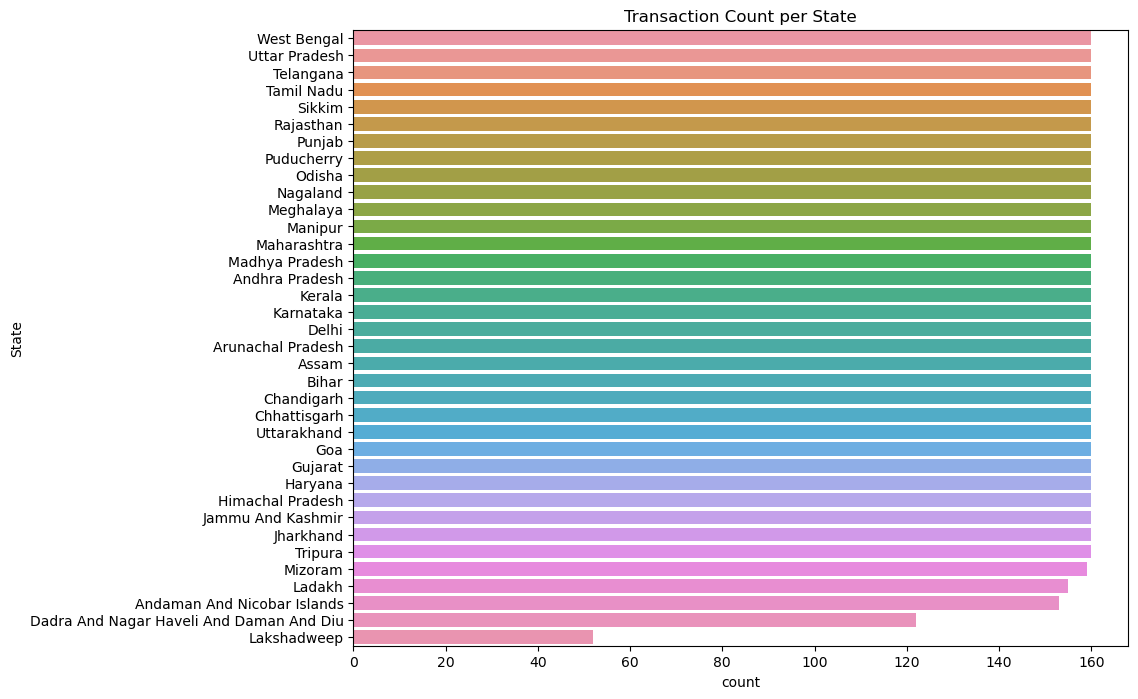

In [75]:
plt.figure(figsize=(10, 8))
sns.countplot(y='State', data=ttp, order=ttp['State'].value_counts().index)
plt.title('Transaction Count per State')
plt.show()

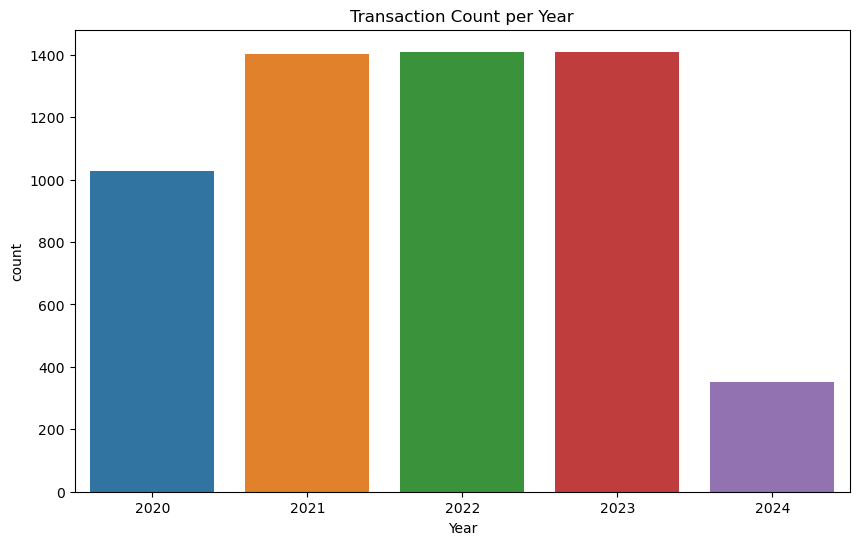

In [76]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=ttp)
plt.title('Transaction Count per Year')
plt.show()

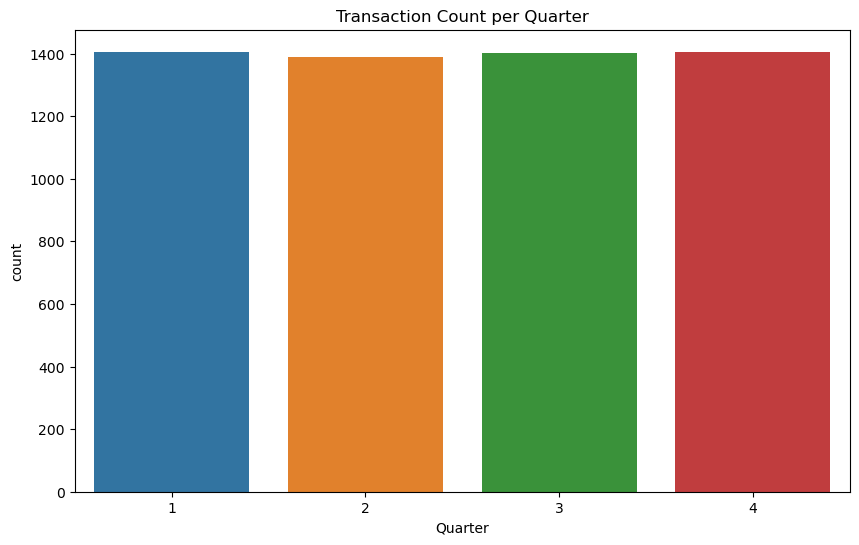

In [78]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Quarter', data=ttp)
plt.title('Transaction Count per Quarter')
plt.show()

c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


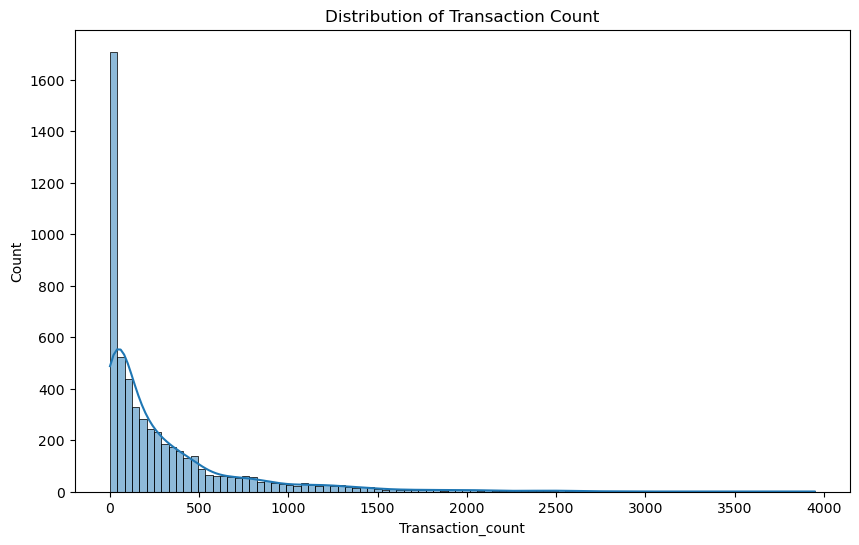

In [79]:
plt.figure(figsize=(10, 6))
sns.histplot(ttp['Transaction_count'], kde=True)
plt.title('Distribution of Transaction Count')
plt.show()

c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


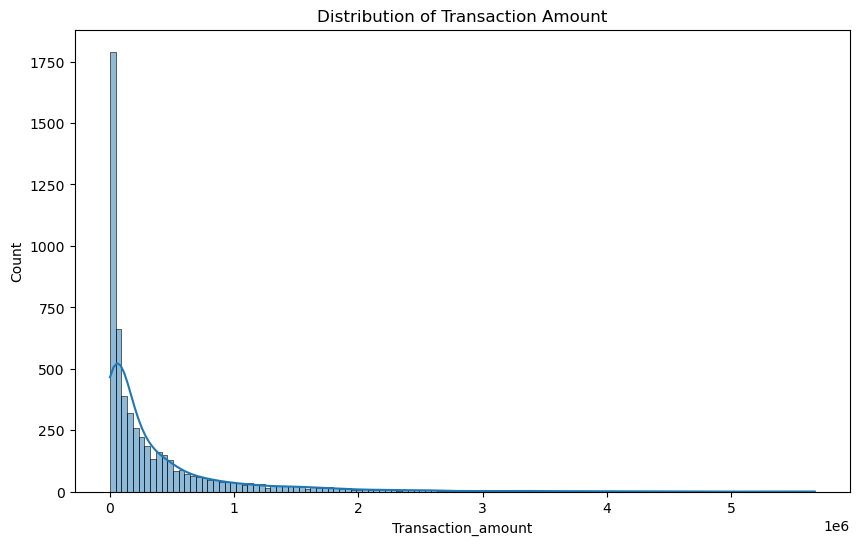

In [80]:
plt.figure(figsize=(10, 6))
sns.histplot(ttp['Transaction_amount'], kde=True)
plt.title('Distribution of Transaction Amount')
plt.show()

Bivariant Analysis

Transaction amount vs. Transaction count

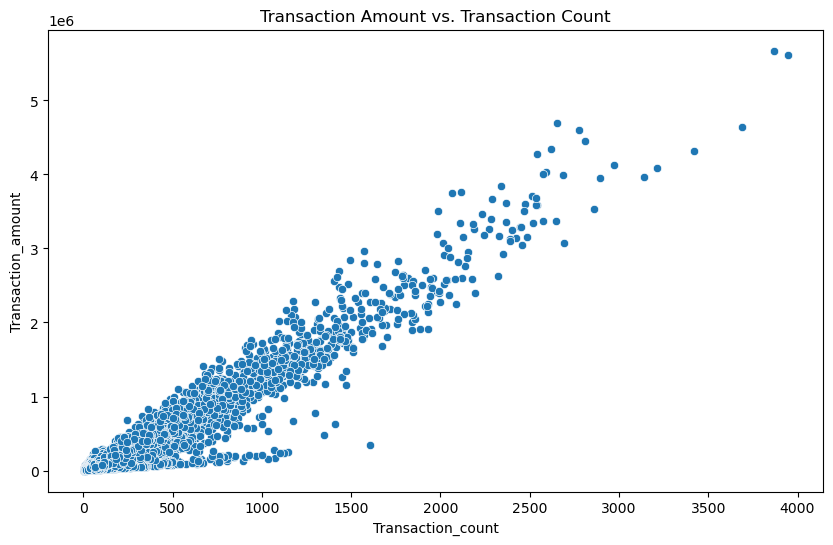

In [81]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Transaction_count', y='Transaction_amount', data=ttp)
plt.title('Transaction Amount vs. Transaction Count')
plt.show()

In [257]:
ttp.select_dtypes(include=['int','float']).corr()

,Year,Quarter,Transaction_count,Transaction_amount
Year,1.000000,-0.280878,0.315392,0.418724
Quarter,-0.280878,1.000000,0.003502,-0.008345
Transaction_count,0.315392,0.003502,1.000000,0.961208
Transaction_amount,0.418724,-0.008345,0.961208,1.000000


Transaction amount over time (Year and Quarter)

c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


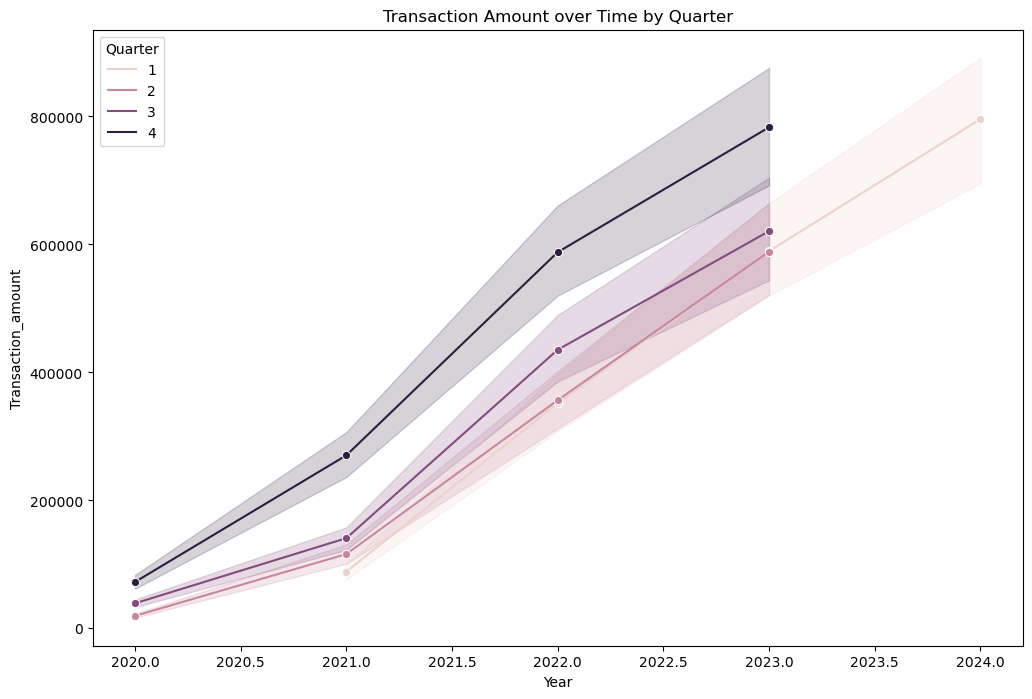

In [82]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Transaction_amount', hue='Quarter', data=ttp, marker='o')
plt.title('Transaction Amount over Time by Quarter')
plt.show()

Transaction count over time (Year and Quarter)

c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


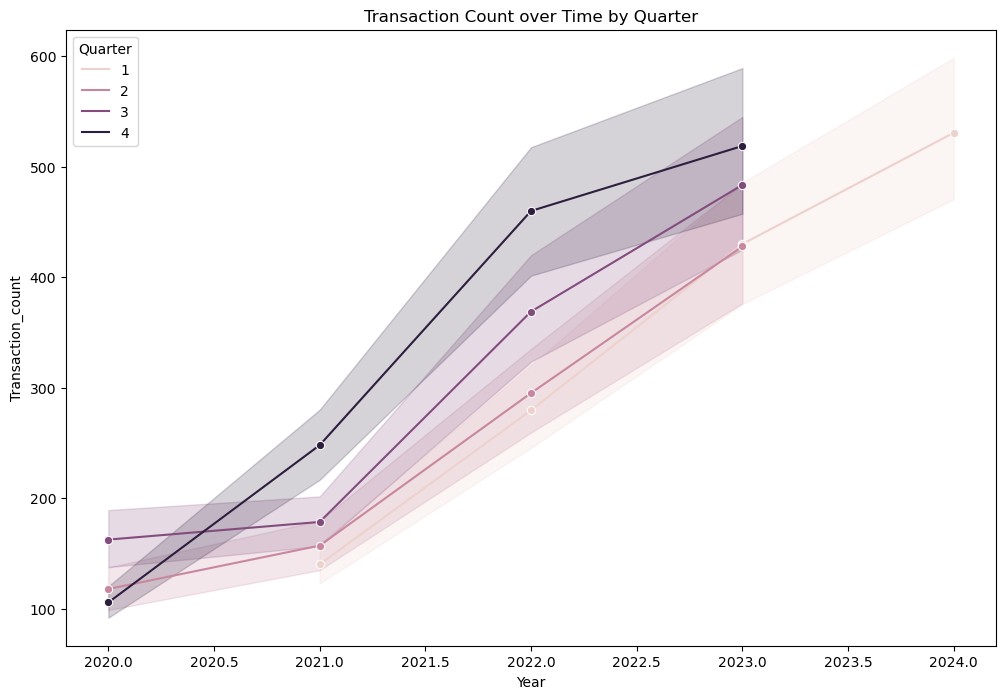

In [83]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Transaction_count', hue='Quarter', data=ttp, marker='o')
plt.title('Transaction Count over Time by Quarter')
plt.show()

Multivariate Analysis

Correlation heatmap

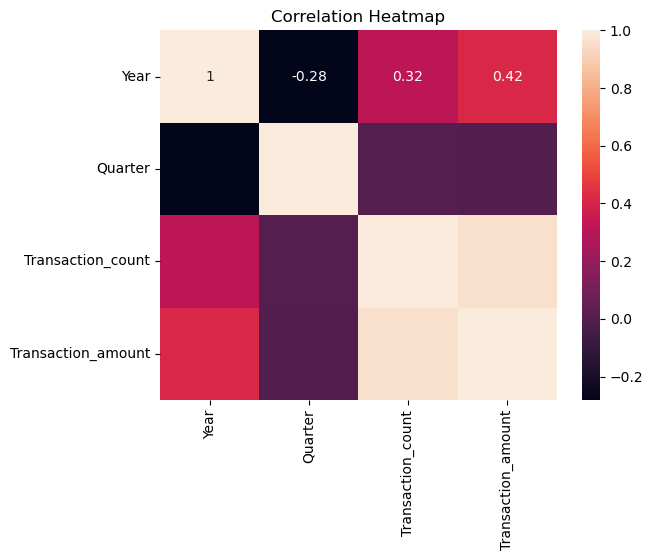

In [84]:
corltn=ttp.select_dtypes(include='number').corr()
sns.heatmap(corltn, annot=True)
plt.title('Correlation Heatmap')
plt.show()


Aggregation and Grouping

Group by State

In [85]:
pd.set_option('display.max_rows', 50)

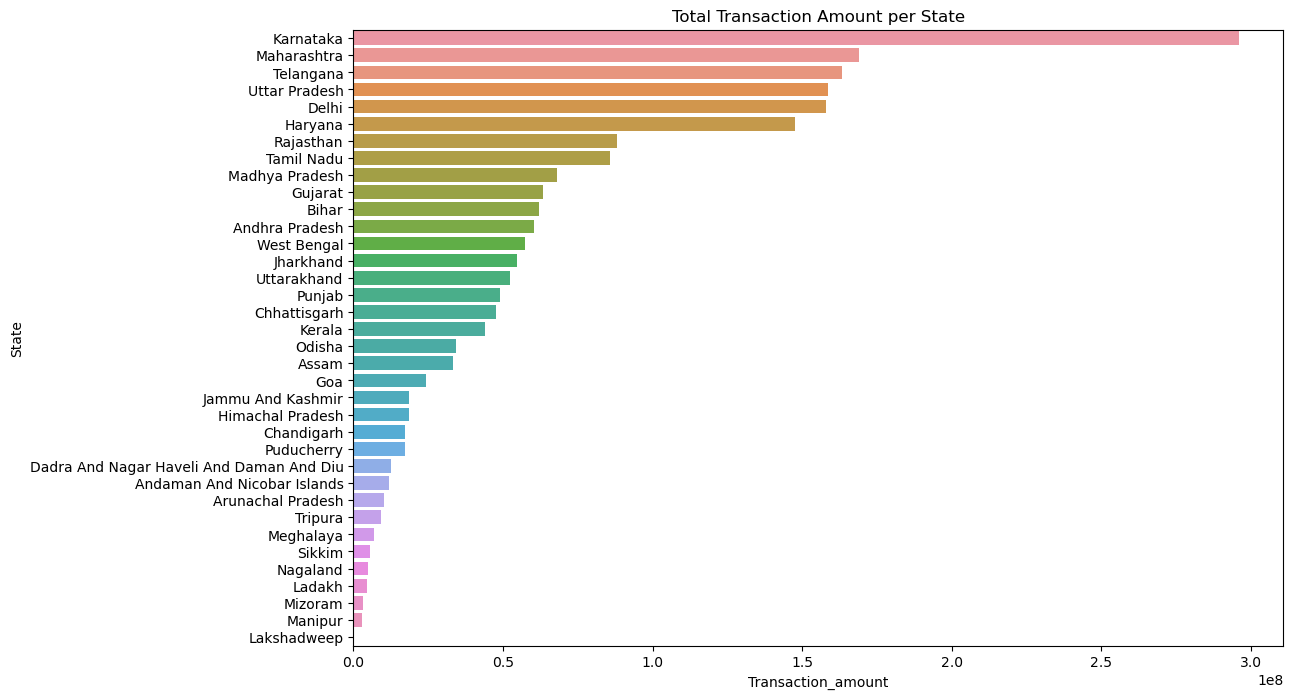

In [270]:
state_group = ttp.groupby('State').agg({'Transaction_amount': 'sum'}).reset_index()
#print(state_group.sort_values(by='Transaction_amount', ascending=False))
plt.figure(figsize=(12, 8))
state_group = state_group.sort_values('Transaction_amount', ascending=False)
sns.barplot(y='State', x='Transaction_amount', data=state_group)
plt.title('Total Transaction Amount per State')
plt.show()


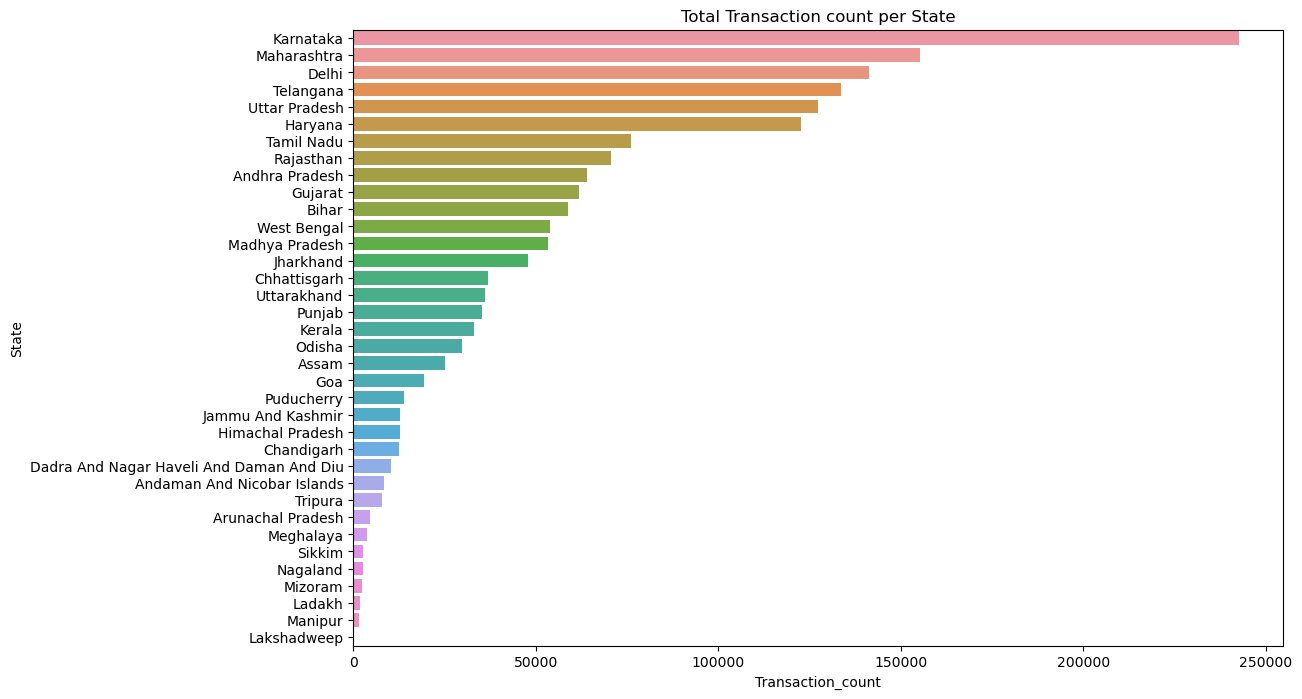

In [272]:
state_group1 = ttp.groupby('State').agg({'Transaction_count': 'sum'}).reset_index()
#print(state_group1.sort_values(by='Transaction_count', ascending=False))
plt.figure(figsize=(12, 8))
state_group1 = state_group1.sort_values('Transaction_count', ascending=False)
sns.barplot(y='State', x='Transaction_count', data=state_group1)
plt.title('Total Transaction count per State')
plt.show()

Group by Year and Quarter

In [89]:
time_group = ttp.groupby(['Year', 'Quarter']).agg({'Transaction_amount': 'sum', 'Transaction_count': 'sum'}).reset_index()
print(time_group)

    Year  Quarter  Transaction_amount  Transaction_count
0   2020        2           6526791.0              39363
1   2020        3          13594469.0              56413
2   2020        4          25070767.0              36570
3   2021        1          31021875.0              49071
4   2021        2          40631541.0              55001
5   2021        3          49618058.0              62849
6   2021        4          95183624.0              87314
7   2022        1         124131338.0              98707
8   2022        2         125149181.0             103612
9   2022        3         153258385.0             129856
10  2022        4         206929665.0             161906
11  2023        1         206900097.0             150944
12  2023        2         207836352.0             151051
13  2023        3         218505605.0             170216
14  2023        4         277187253.0             183639
15  2024        1         280124812.0             186814


C:\Users\hp\AppData\Local\Temp\ipykernel_20028\920521292.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(time_group['Year'].astype(str) + ' Q' + time_group['Quarter'].astype(str), rotation=45, ha='right')


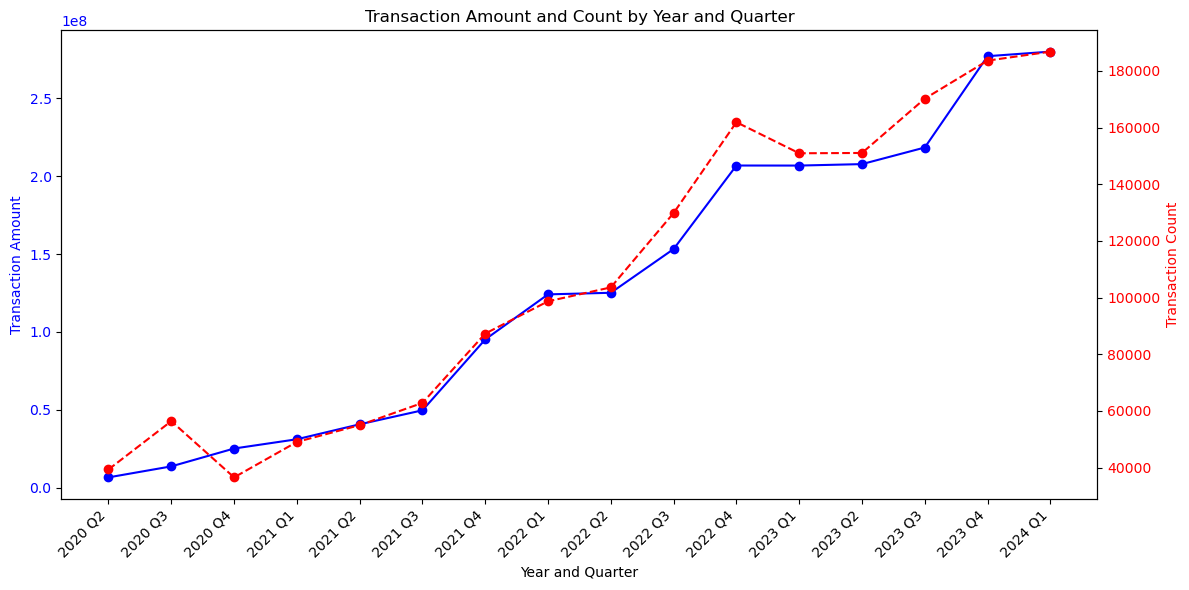

In [267]:
import matplotlib.pyplot as plt

# Assuming `time_group` is your DataFrame
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Transaction Amount
ax1.plot(time_group['Year'].astype(str) + ' Q' + time_group['Quarter'].astype(str), 
         time_group['Transaction_amount'], color='b', marker='o', label='Transaction Amount')
ax1.set_xlabel('Year and Quarter')
ax1.set_ylabel('Transaction Amount', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(time_group['Year'].astype(str) + ' Q' + time_group['Quarter'].astype(str), rotation=45, ha='right')

# Creating a second y-axis to plot Transaction Count
ax2 = ax1.twinx()
ax2.plot(time_group['Year'].astype(str) + ' Q' + time_group['Quarter'].astype(str), 
         time_group['Transaction_count'], color='r', marker='o', linestyle='--', label='Transaction Count')
ax2.set_ylabel('Transaction Count', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Adding titles and legends
plt.title('Transaction Amount and Count by Year and Quarter')
fig.tight_layout()  # To ensure labels and titles fit into the figure area
plt.show()


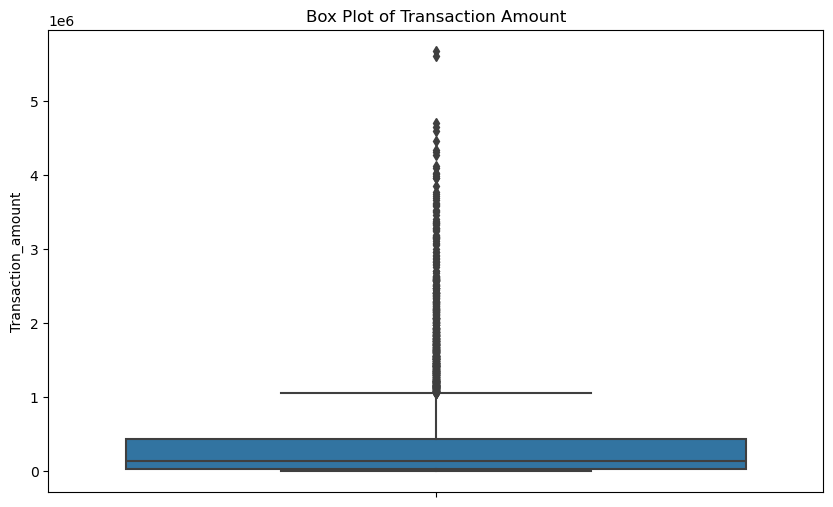

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='Transaction_amount', data=df)
plt.title('Box Plot of Transaction Amount')
plt.show()

Grouping by pincode and state

In [127]:
ttp_grouped = ttp.groupby(['State', 'Pincode']).agg({'Transaction_amount': 'sum'}).reset_index()

top_10_pincodes = ttp_grouped.sort_values(by='Transaction_amount', ascending=False).head(10)

print(top_10_pincodes)

             State Pincode  Transaction_amount
361      Karnataka  560068          43202218.0
357      Karnataka  560043          33698751.0
362      Karnataka  560076          32995828.0
355      Karnataka  560037          31651599.0
727      Telangana  500072          31447663.0
363      Karnataka  560078          30493914.0
250        Haryana  122001          26019439.0
367      Karnataka  560100          25021920.0
183          Delhi  110059          24467103.0
771  Uttar Pradesh  201301          24131100.0


In [128]:
ttp_grouped = ttp.groupby(['State', 'Pincode','Year','Quarter']).agg({'Transaction_amount': 'sum'}).reset_index()

top_10_pincodes = ttp_grouped.sort_values(by='Transaction_amount', ascending=False).head(10)

print(top_10_pincodes)

          State Pincode  Year  Quarter  Transaction_amount
2439  Karnataka  560068  2024        1           5672343.0
2438  Karnataka  560068  2023        4           5606578.0
2388  Karnataka  560043  2024        1           4698522.0
2437  Karnataka  560068  2023        3           4646310.0
2455  Karnataka  560076  2024        1           4596888.0
2387  Karnataka  560043  2023        4           4454698.0
2471  Karnataka  560078  2024        1           4342390.0
2434  Karnataka  560068  2022        4           4310528.0
4896  Telangana  500072  2023        4           4276139.0
2370  Karnataka  560037  2023        4           4120542.0


Aggregation_transaction

In [92]:
a_t=pd.read_csv("pulse-master/tables/agg_transaction.csv")

In [93]:
a_t

,State,Year,Quarter,Transaction_type,Transaction_count,Transaction_amount
0,Andaman And Nicobar Islands,2018,1,Recharge & bill payments,4200,1.845307e+06
1,Andaman And Nicobar Islands,2018,1,Peer-to-peer payments,1871,1.213866e+07
2,Andaman And Nicobar Islands,2018,1,Merchant payments,298,4.525072e+05
3,Andaman And Nicobar Islands,2018,1,Financial Services,33,1.060142e+04
4,Andaman And Nicobar Islands,2018,1,Others,256,1.846899e+05
...,...,...,...,...,...,...
4489,West Bengal,2024,1,Merchant payments,407607197,2.732137e+11
4490,West Bengal,2024,1,Peer-to-peer payments,355646156,1.100744e+12
4491,West Bengal,2024,1,Recharge & bill payments,72216060,4.716192e+10
4492,West Bengal,2024,1,Financial Services,451008,5.307383e+08


In [94]:
a_t.shape

(4494, 6)

In [95]:
a_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4494 entries, 0 to 4493
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               4494 non-null   object 
 1   Year                4494 non-null   int64  
 2   Quarter             4494 non-null   int64  
 3   Transaction_type    4494 non-null   object 
 4   Transaction_count   4494 non-null   int64  
 5   Transaction_amount  4494 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 210.8+ KB


In [96]:
a_t.describe()

,Year,Quarter,Transaction_count,Transaction_amount
count,4494.000000,4494.000000,4.494000e+03,4.494000e+03
mean,2020.642412,2.440810,3.498394e+07,5.459639e+10
std,1.808452,1.134388,1.259652e+08,2.197381e+11
min,2018.000000,1.000000,2.000000e+00,3.439721e+01
25%,2019.000000,1.000000,5.070700e+04,3.451190e+07
50%,2021.000000,2.000000,4.507395e+05,3.676365e+08
75%,2022.000000,3.000000,9.484871e+06,8.857347e+09
max,2024.000000,4.000000,1.821471e+09,2.641887e+12


In [97]:
a_t.isnull().sum()

State                 0
Year                  0
Quarter               0
Transaction_type      0
Transaction_count     0
Transaction_amount    0
dtype: int64

In [98]:
a_t.duplicated().sum()

0

Univariant Analysis

c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


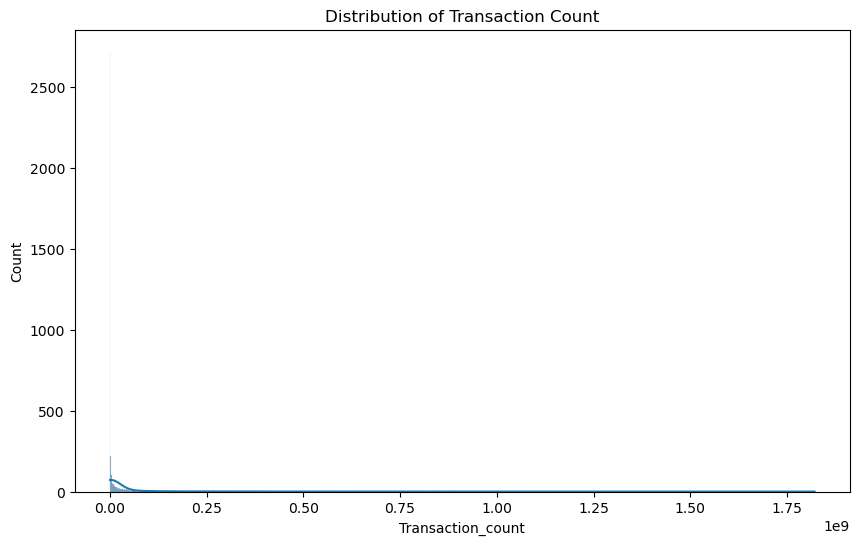

c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


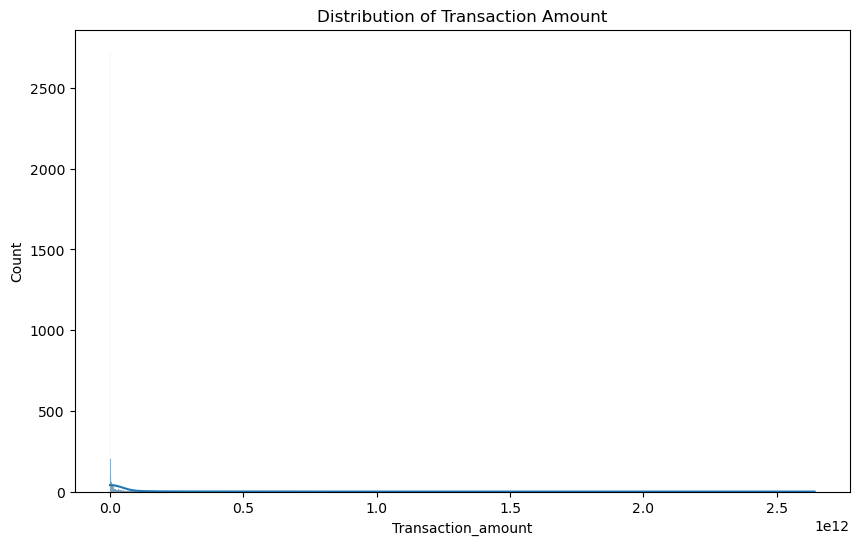

In [99]:
plt.figure(figsize=(10, 6))
sns.histplot(a_t['Transaction_count'], kde=True)
plt.title('Distribution of Transaction Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(a_t['Transaction_amount'], kde=True)
plt.title('Distribution of Transaction Amount')
plt.show()

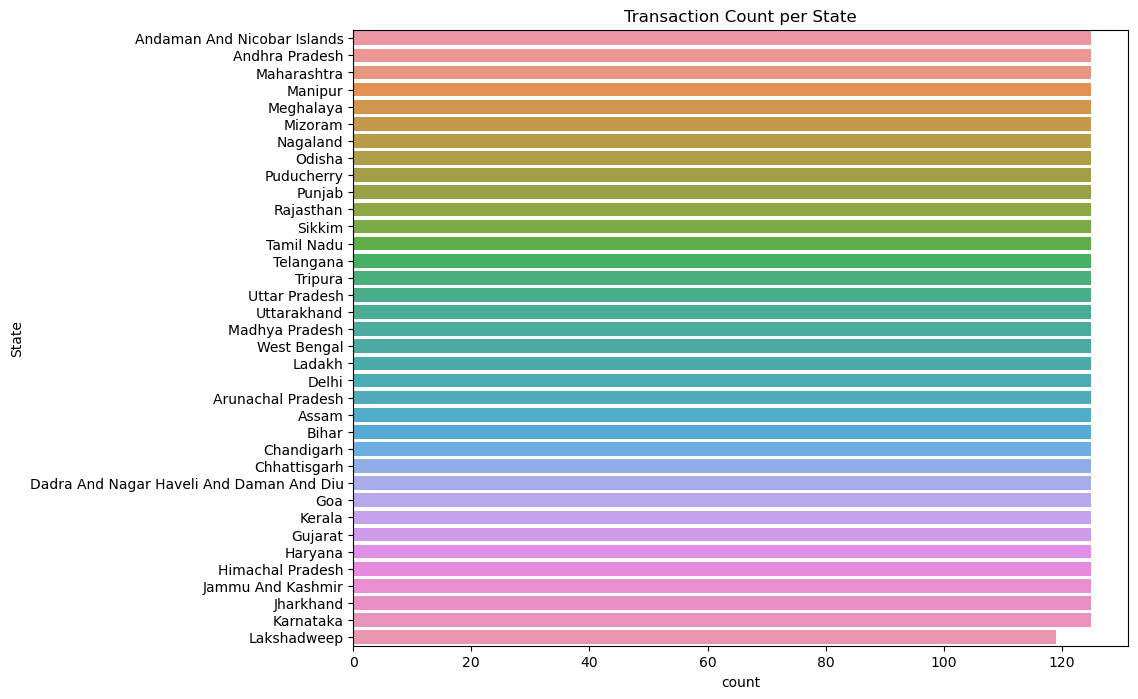

In [100]:
plt.figure(figsize=(10, 8))
sns.countplot(y='State', data=a_t, order=a_t['State'].value_counts().index)
plt.title('Transaction Count per State')
plt.show()

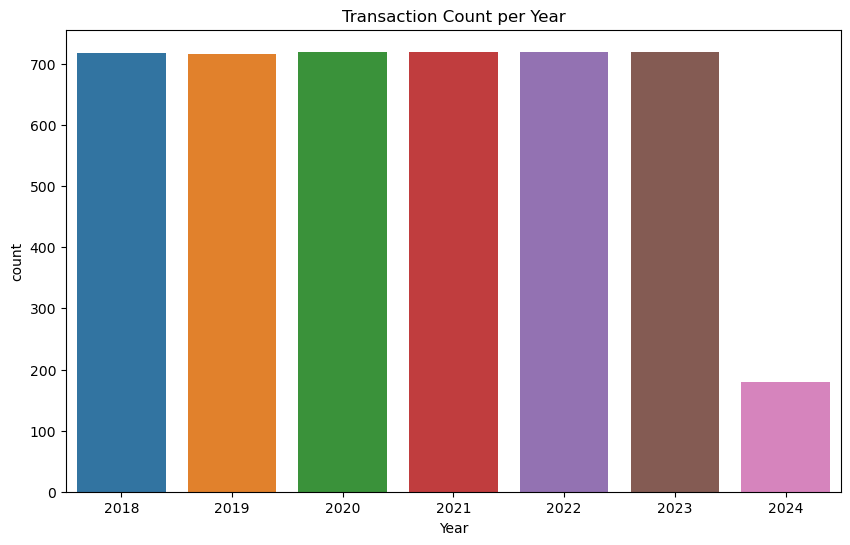

In [101]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=a_t)
plt.title('Transaction Count per Year')
plt.show()

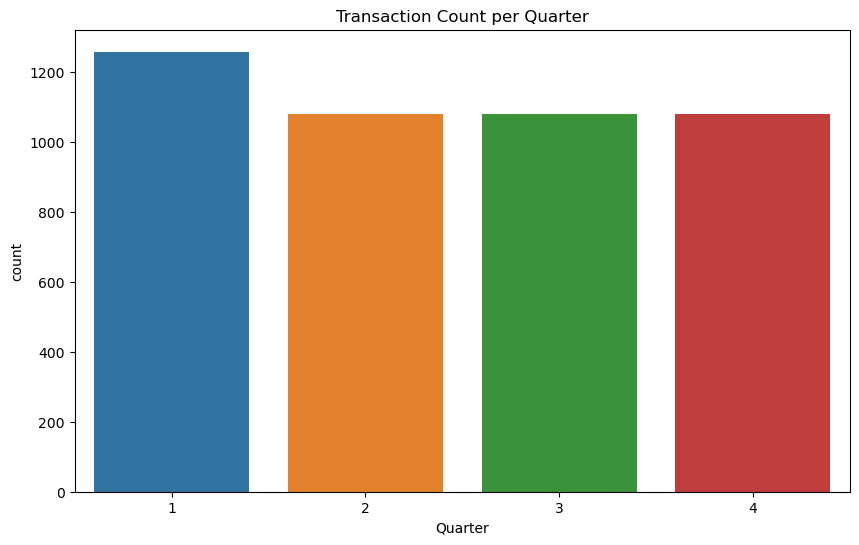

In [102]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Quarter', data=a_t)
plt.title('Transaction Count per Quarter')
plt.show()

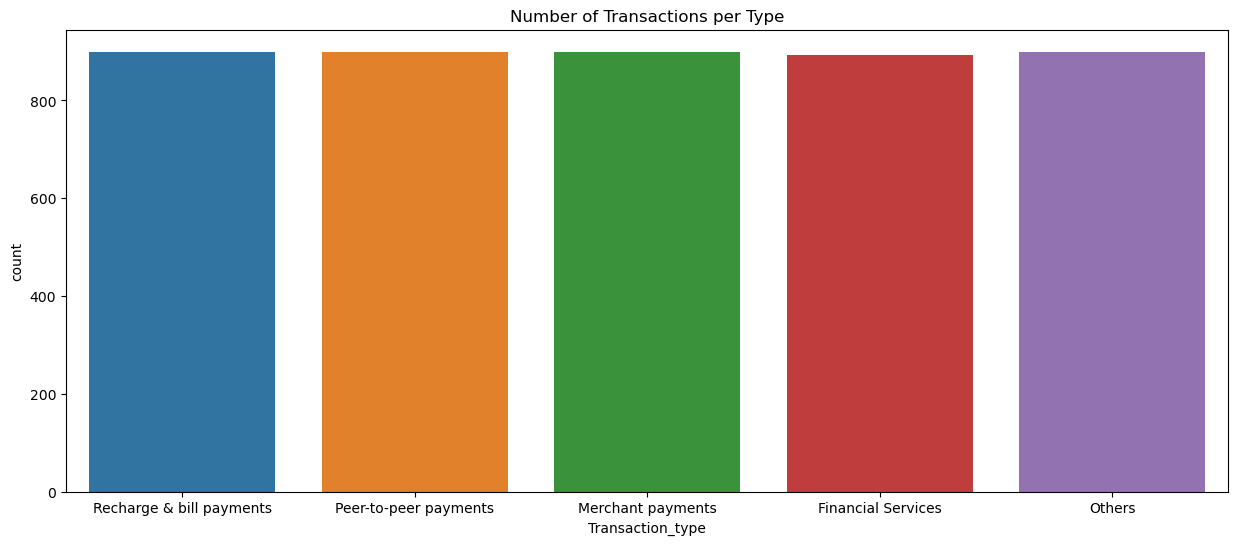

In [103]:
plt.figure(figsize=(15, 6))
sns.countplot(data=a_t, x='Transaction_type')
plt.title('Number of Transactions per Type')
plt.show()

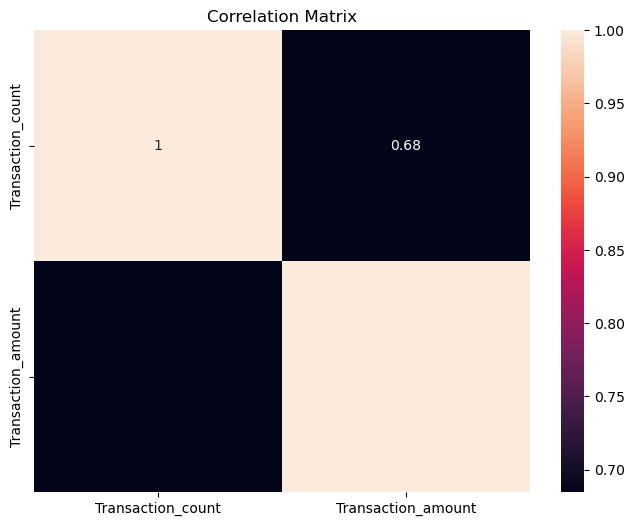

In [104]:
plt.figure(figsize=(8, 6))
sns.heatmap(a_t[['Transaction_count', 'Transaction_amount']].corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

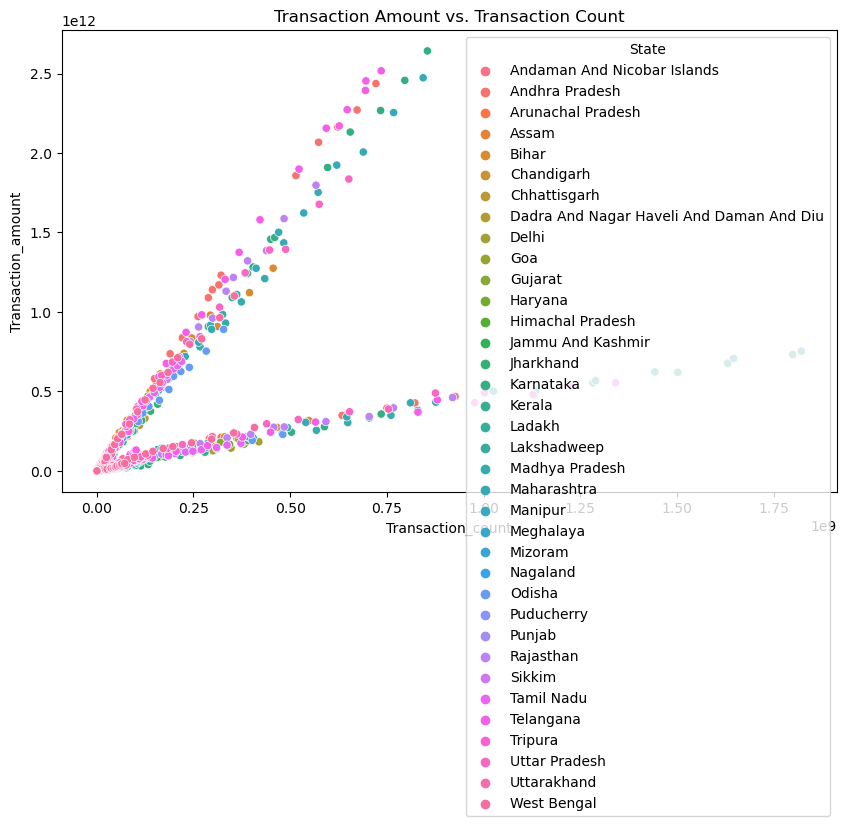

In [105]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=a_t, x='Transaction_count', y='Transaction_amount', hue='State')
plt.title('Transaction Amount vs. Transaction Count')
plt.show()

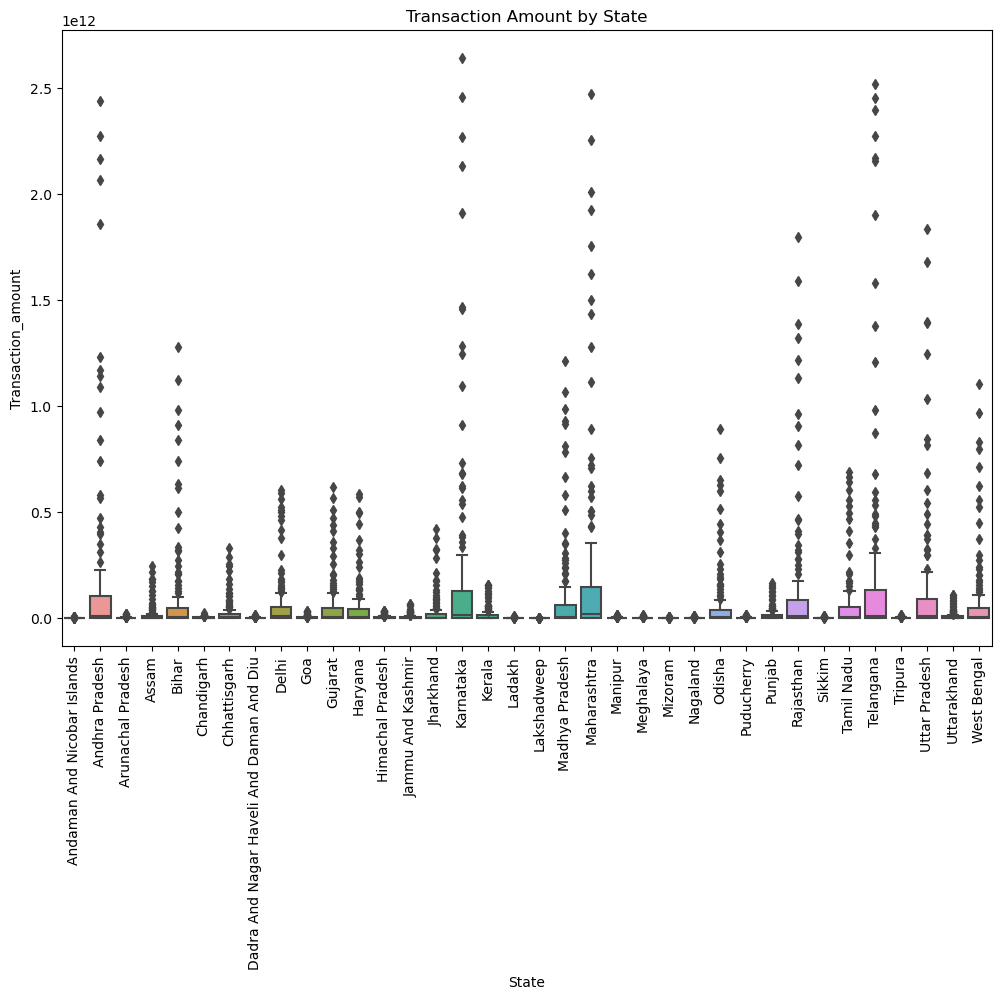

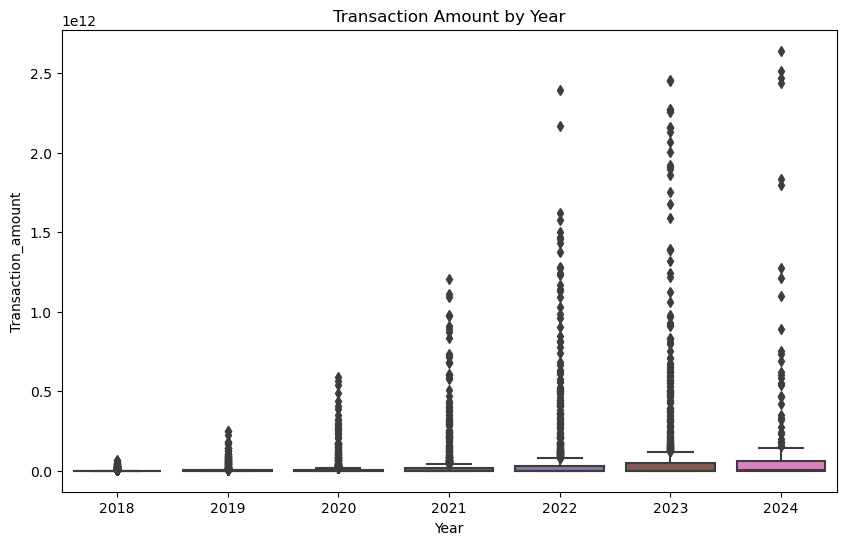

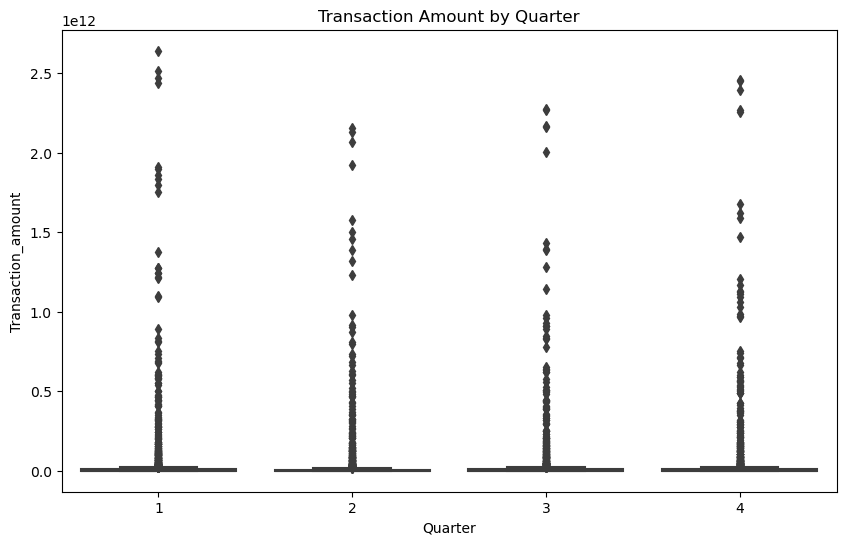

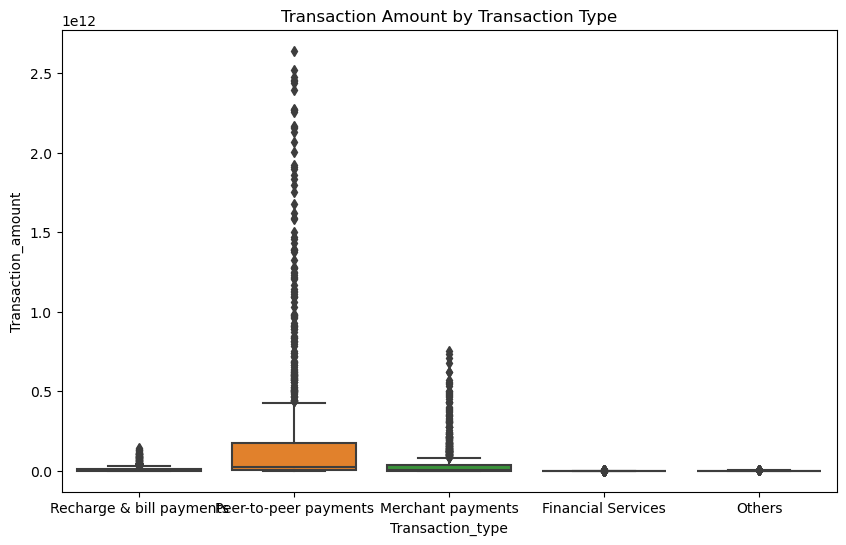

In [106]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=a_t, x='State', y='Transaction_amount')
plt.title('Transaction Amount by State')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=a_t, x='Year', y='Transaction_amount')
plt.title('Transaction Amount by Year')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=a_t, x='Quarter', y='Transaction_amount')
plt.title('Transaction Amount by Quarter')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=a_t, x='Transaction_type', y='Transaction_amount')
plt.title('Transaction Amount by Transaction Type')
plt.show()

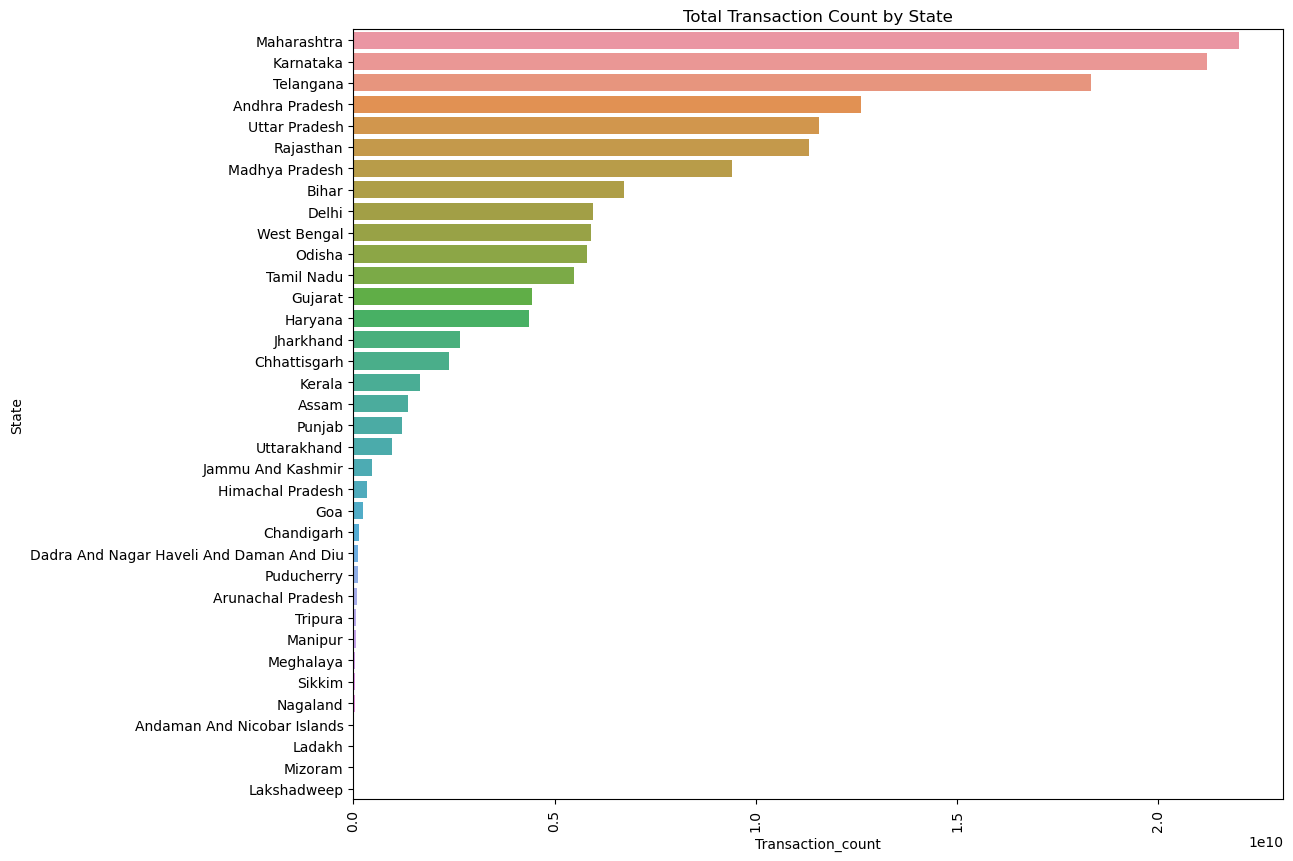

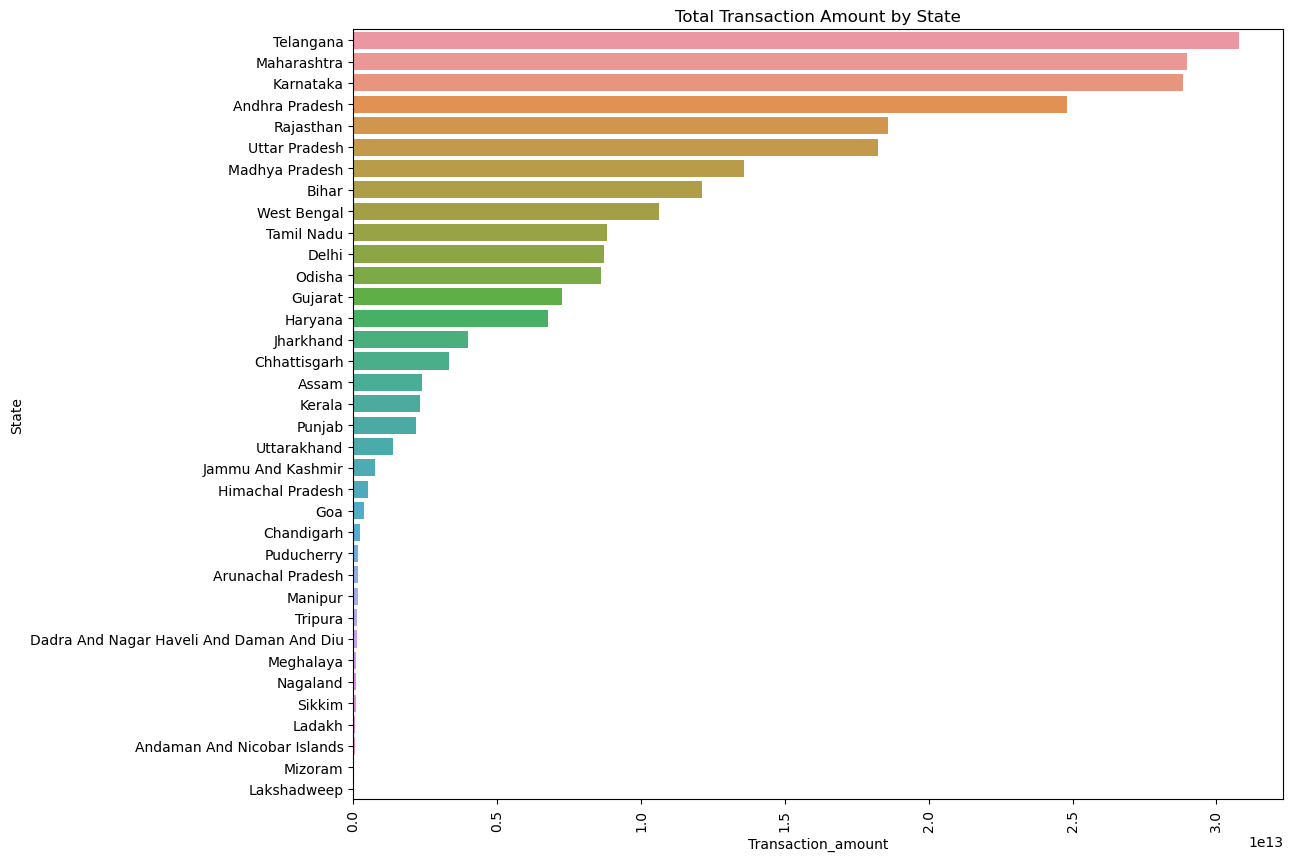

In [108]:
state_data = a_t.groupby('State').agg({'Transaction_count': 'sum', 'Transaction_amount': 'sum'}).reset_index()

plt.figure(figsize=(12, 10))
sns.barplot(data=state_data.sort_values(by='Transaction_count', ascending=False), y='State', x='Transaction_count')
plt.title('Total Transaction Count by State')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 10))
sns.barplot(data=state_data.sort_values(by='Transaction_amount',ascending=False), y='State', x='Transaction_amount')
plt.title('Total Transaction Amount by State')
plt.xticks(rotation=90)
plt.show()

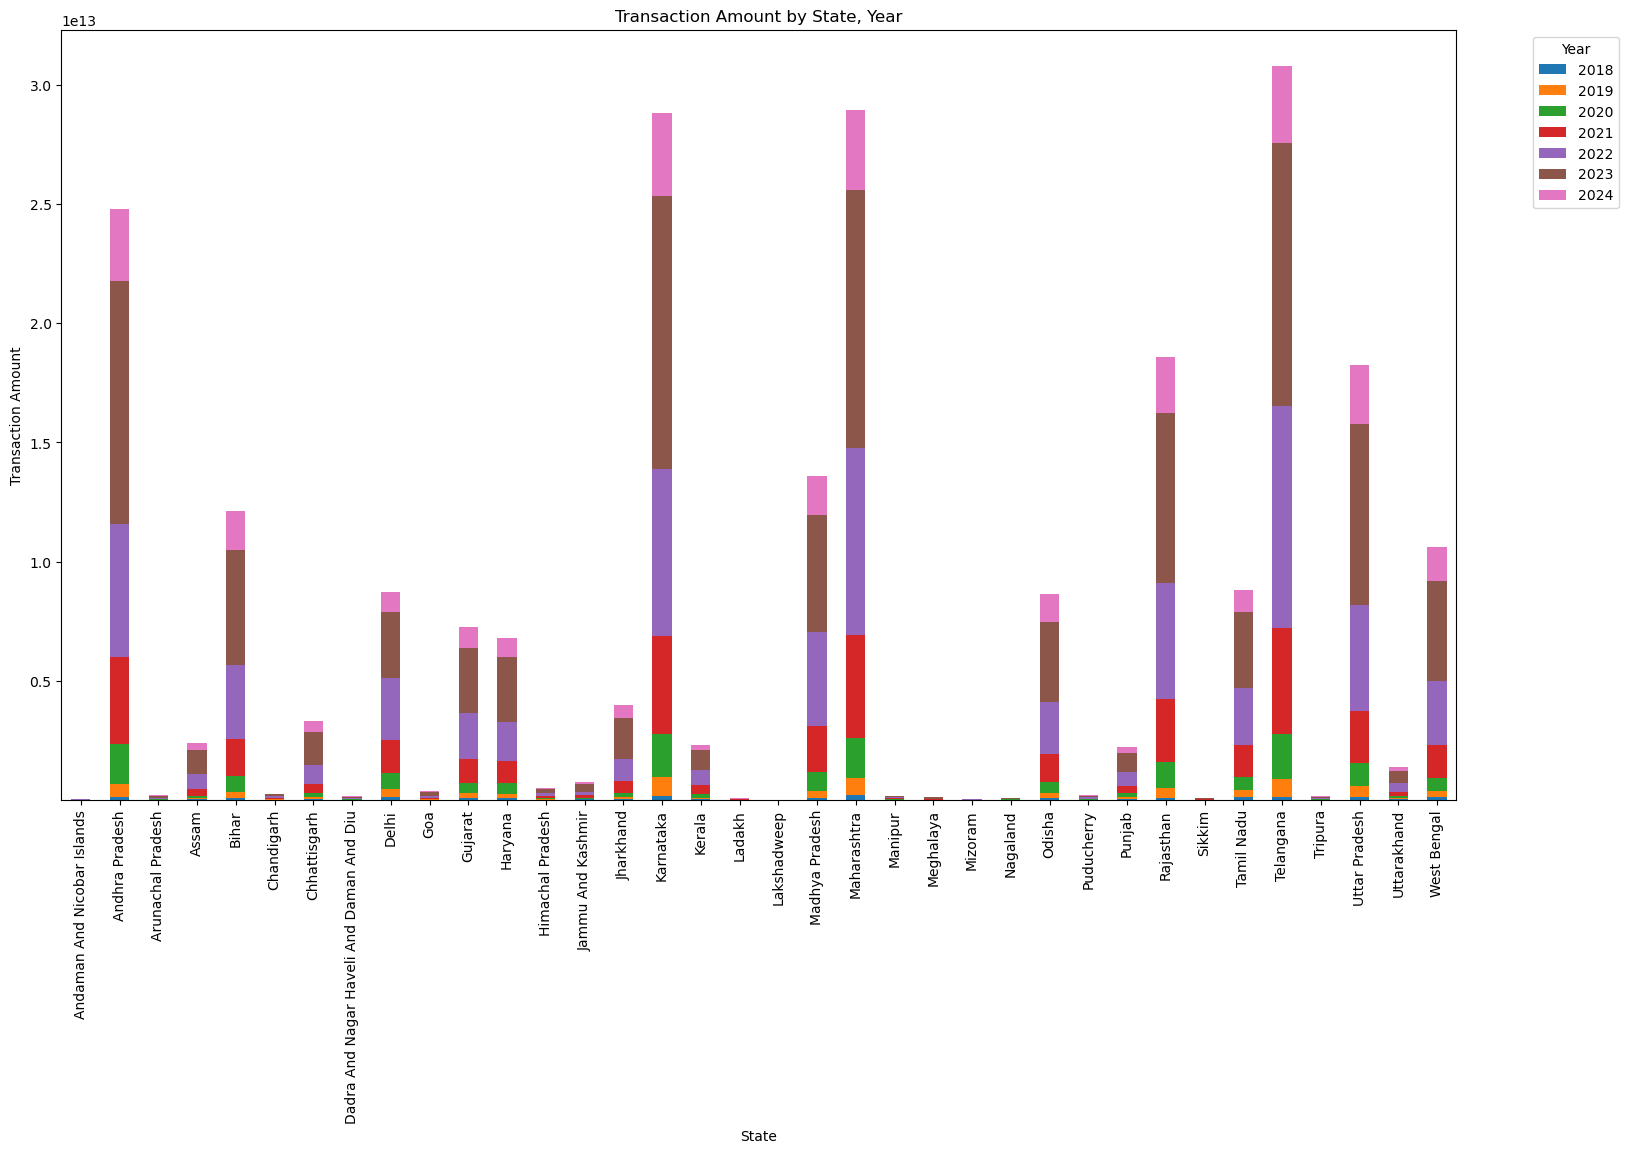

In [138]:
a_t_agg_year = a_t.groupby(['State', 'Year']).agg({'Transaction_amount': 'sum'}).reset_index()

# Pivot after aggregation
pivot_table = a_t_agg_year.pivot(index='State', columns='Year', values='Transaction_amount')
pivot_table.plot(kind='bar', stacked=True, figsize=(18, 10))
plt.title('Transaction Amount by State, Year')
plt.ylabel('Transaction Amount')
plt.xlabel('State')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()


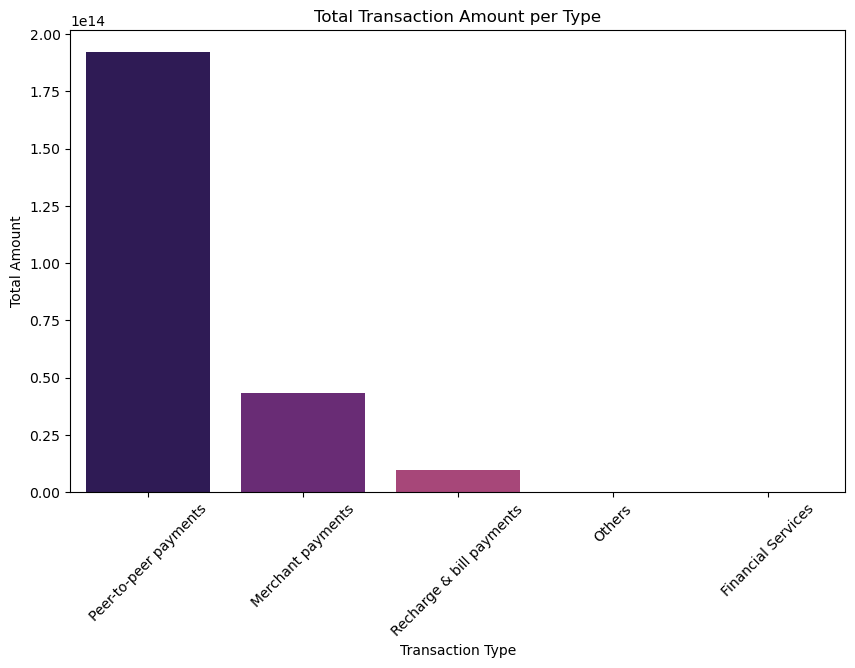

In [152]:
transaction_type_amounts = a_t.groupby('Transaction_type')['Transaction_amount'].sum().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=transaction_type_amounts.index, y=transaction_type_amounts.values, palette='magma')
plt.title('Total Transaction Amount per Type')
plt.xlabel('Transaction Type')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()


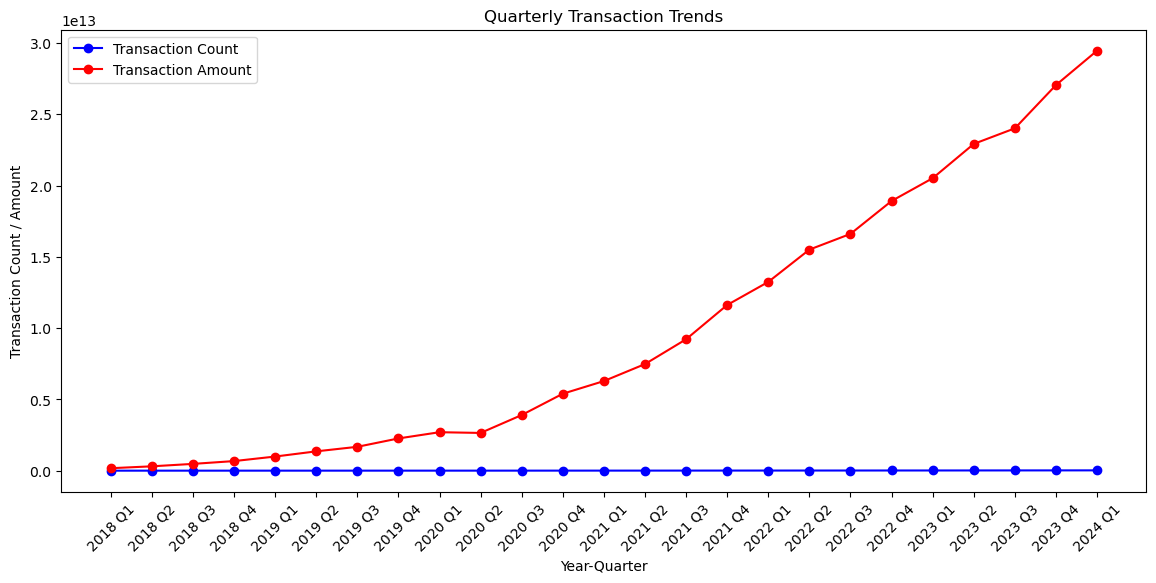

In [146]:
a_t['Date'] = pd.to_datetime(a_t['Year'].astype(str) + '-' + a_t['Quarter'].astype(str) + '-01')
df_time = a_t.groupby('Date').agg({'Transaction_count': 'sum', 'Transaction_amount': 'sum'}).reset_index()

quarterly_trend = a_t.groupby(['Year', 'Quarter']).agg({'Transaction_count': 'sum', 'Transaction_amount': 'sum'}).reset_index()
quarterly_trend['Year-Quarter'] = quarterly_trend['Year'].astype(str) + ' Q' + quarterly_trend['Quarter'].astype(str)

plt.figure(figsize=(14, 6))
plt.plot(quarterly_trend['Year-Quarter'], quarterly_trend['Transaction_count'], label='Transaction Count', marker='o', color='blue')
plt.plot(quarterly_trend['Year-Quarter'], quarterly_trend['Transaction_amount'], label='Transaction Amount', marker='o', color='red')
plt.xlabel('Year-Quarter')
plt.xticks(rotation=45)
plt.ylabel('Transaction Count / Amount')
plt.title('Quarterly Transaction Trends')
plt.legend()
plt.show()


Aggregation_user

In [154]:
a_u=pd.read_csv("pulse-master/tables/agg_user.csv")

In [155]:
a_u

,State,Year,Quarter,Brand,Transaction_count,Percentage
0,Andaman And Nicobar Islands,2018,1,Xiaomi,1665,0.247033
1,Andaman And Nicobar Islands,2018,1,Samsung,1445,0.214392
2,Andaman And Nicobar Islands,2018,1,Vivo,982,0.145697
3,Andaman And Nicobar Islands,2018,1,Oppo,501,0.074332
4,Andaman And Nicobar Islands,2018,1,OnePlus,332,0.049258
...,...,...,...,...,...,...
6727,West Bengal,2022,1,Lenovo,330017,0.015056
6728,West Bengal,2022,1,Infinix,284678,0.012987
6729,West Bengal,2022,1,Asus,280347,0.012790
6730,West Bengal,2022,1,Apple,277752,0.012671


In [157]:
a_u.shape

(6732, 6)

In [159]:
a_u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6732 entries, 0 to 6731
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              6732 non-null   object 
 1   Year               6732 non-null   int64  
 2   Quarter            6732 non-null   int64  
 3   Brand              6732 non-null   object 
 4   Transaction_count  6732 non-null   int64  
 5   Percentage         6732 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.7+ KB


In [160]:
a_u.describe()

,Year,Quarter,Transaction_count,Percentage
count,6732.000000,6732.000000,6.732000e+03,6732.000000
mean,2019.647059,2.411765,5.140115e+05,0.090909
std,1.233984,1.140715,1.081772e+06,0.083401
min,2018.000000,1.000000,1.000000e+01,0.005158
25%,2019.000000,1.000000,9.354000e+03,0.020513
50%,2020.000000,2.000000,8.472250e+04,0.057718
75%,2021.000000,3.000000,4.555808e+05,0.146007
max,2022.000000,4.000000,1.134094e+07,0.478367


In [163]:
a_u.isnull().sum()

State                0
Year                 0
Quarter              0
Brand                0
Transaction_count    0
Percentage           0
dtype: int64

In [166]:
a_u.duplicated().sum()

0

Univariate Analysis

Distribution of Transaction_count

c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


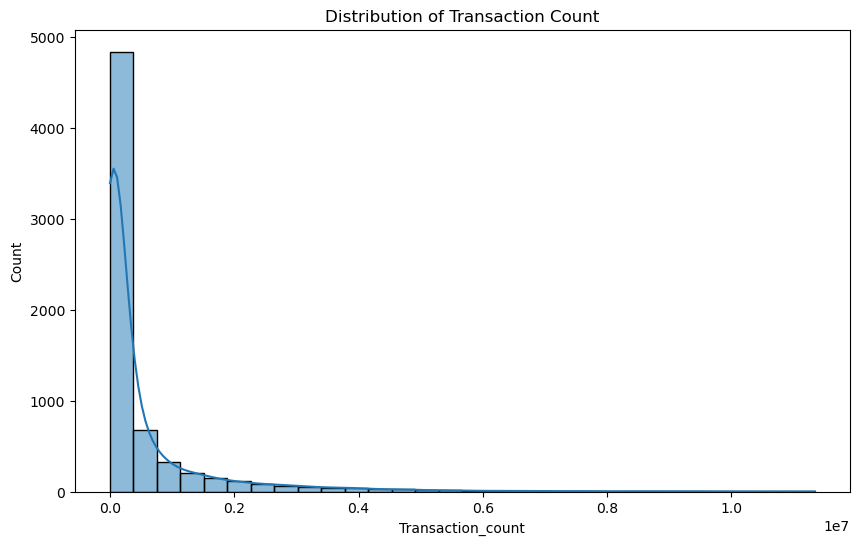

In [168]:
plt.figure(figsize=(10, 6))
sns.histplot(a_u['Transaction_count'], bins=30, kde=True)
plt.title('Distribution of Transaction Count')
plt.show()

c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


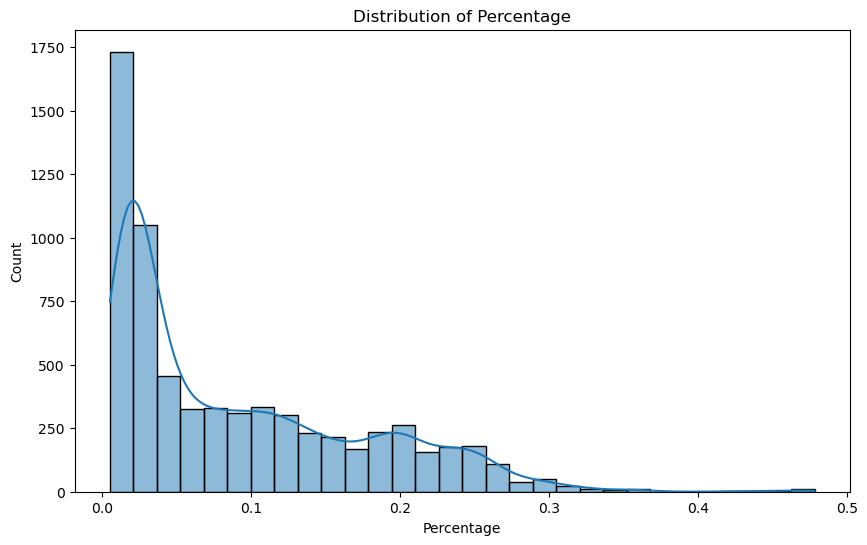

In [169]:
plt.figure(figsize=(10, 6))
sns.histplot(a_u['Percentage'], bins=30, kde=True)
plt.title('Distribution of Percentage')
plt.show()

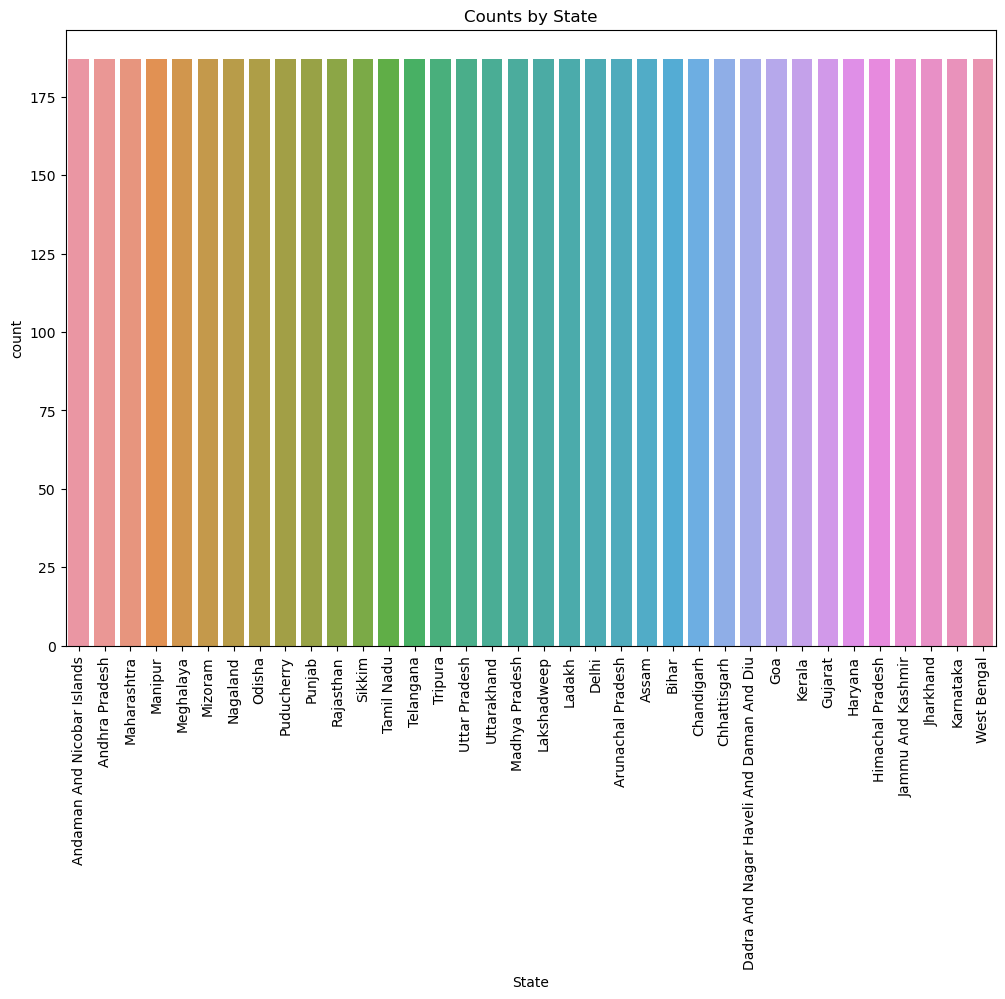

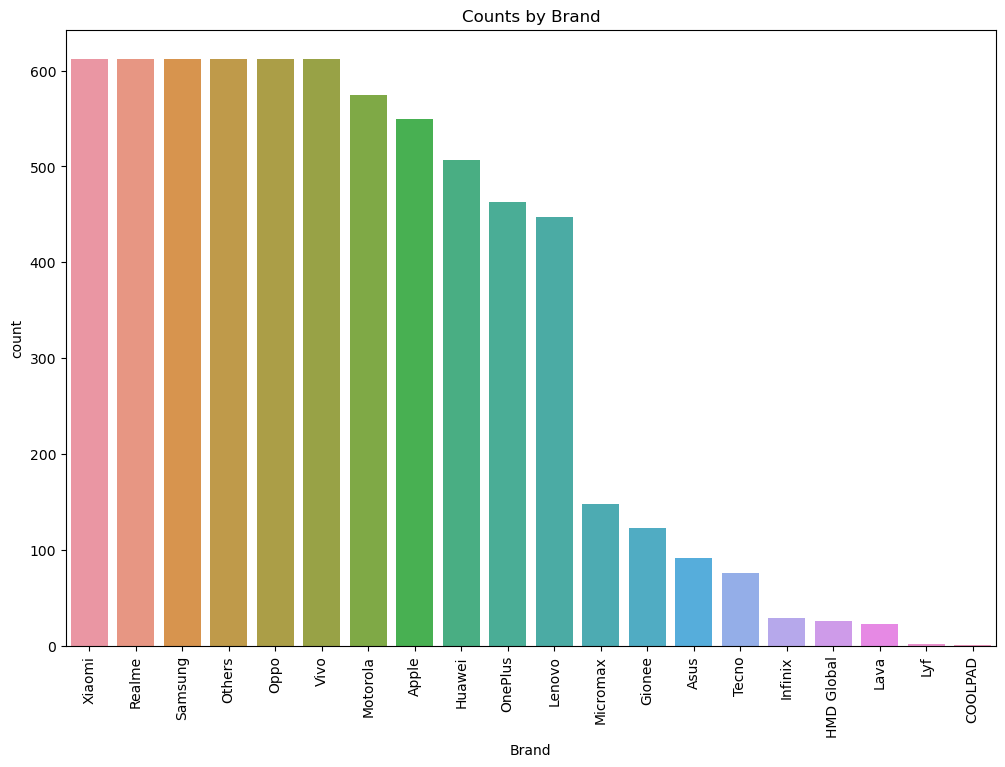

In [170]:
plt.figure(figsize=(12, 8))
sns.countplot(data=a_u, x='State', order=a_u['State'].value_counts().index)
plt.title('Counts by State')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=a_u, x='Brand', order=a_u['Brand'].value_counts().index)
plt.title('Counts by Brand')
plt.xticks(rotation=90)
plt.show()

Bivariate Analysis

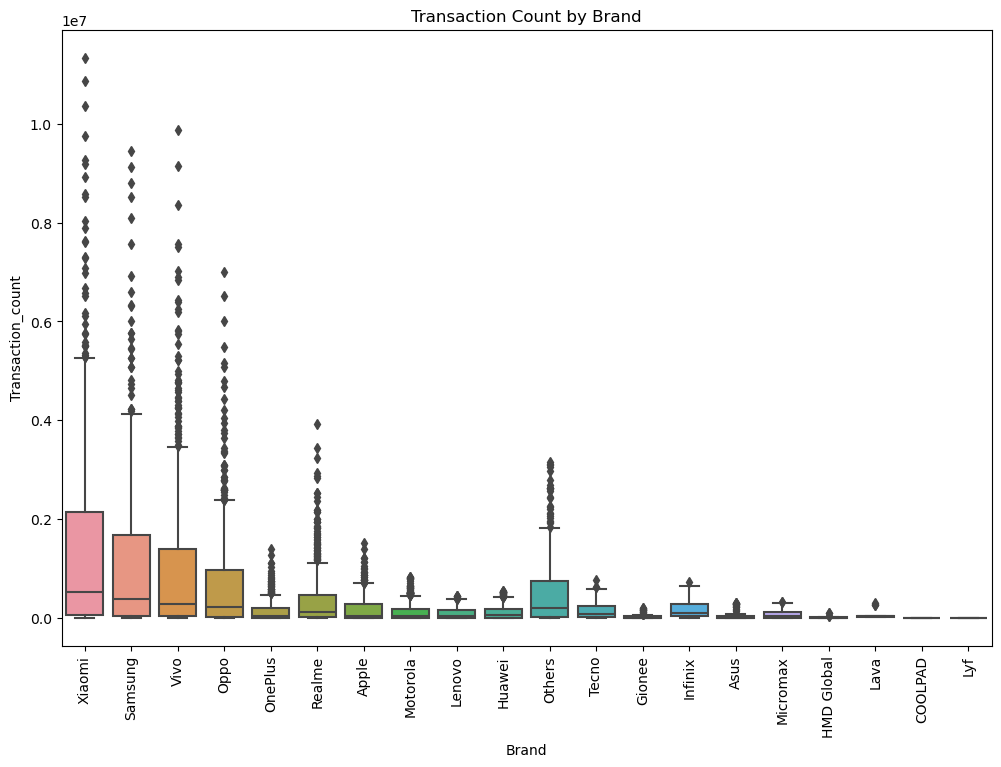

In [171]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=a_u, x='Brand', y='Transaction_count')
plt.title('Transaction Count by Brand')
plt.xticks(rotation=90)
plt.show()

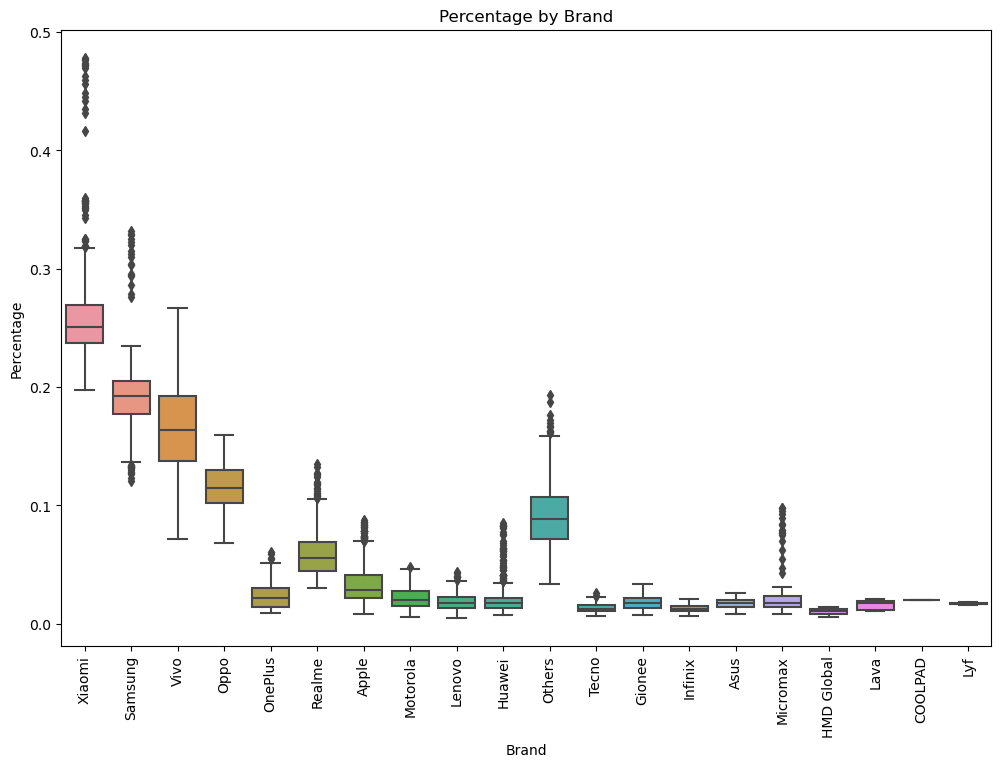

In [172]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=a_u, x='Brand', y='Percentage')
plt.title('Percentage by Brand')
plt.xticks(rotation=90)
plt.show()

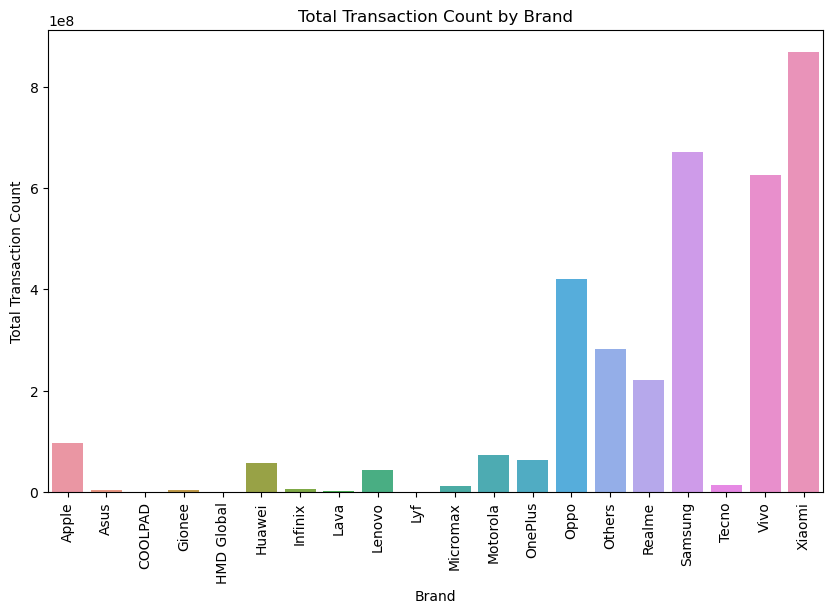

In [183]:
sum_transaction_by_brand = a_u.groupby('Brand')['Transaction_count'].sum()

#print(sum_transaction_by_brand)
plt.figure(figsize=(10, 6))
sns.barplot(x=sum_transaction_by_brand.index, y=sum_transaction_by_brand.values)
plt.title('Total Transaction Count by Brand')
plt.ylabel('Total Transaction Count')
plt.xlabel('Brand')
plt.xticks(rotation=90)
plt.show()

c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


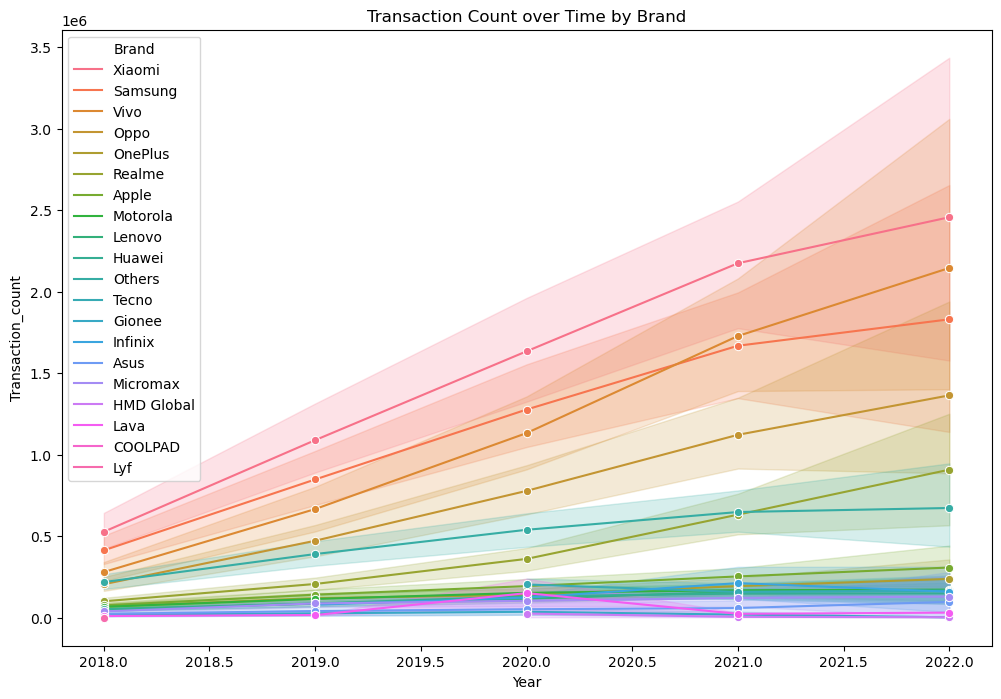

In [173]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=a_u, x='Year', y='Transaction_count', hue='Brand', marker='o')
plt.title('Transaction Count over Time by Brand')
plt.show()

c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


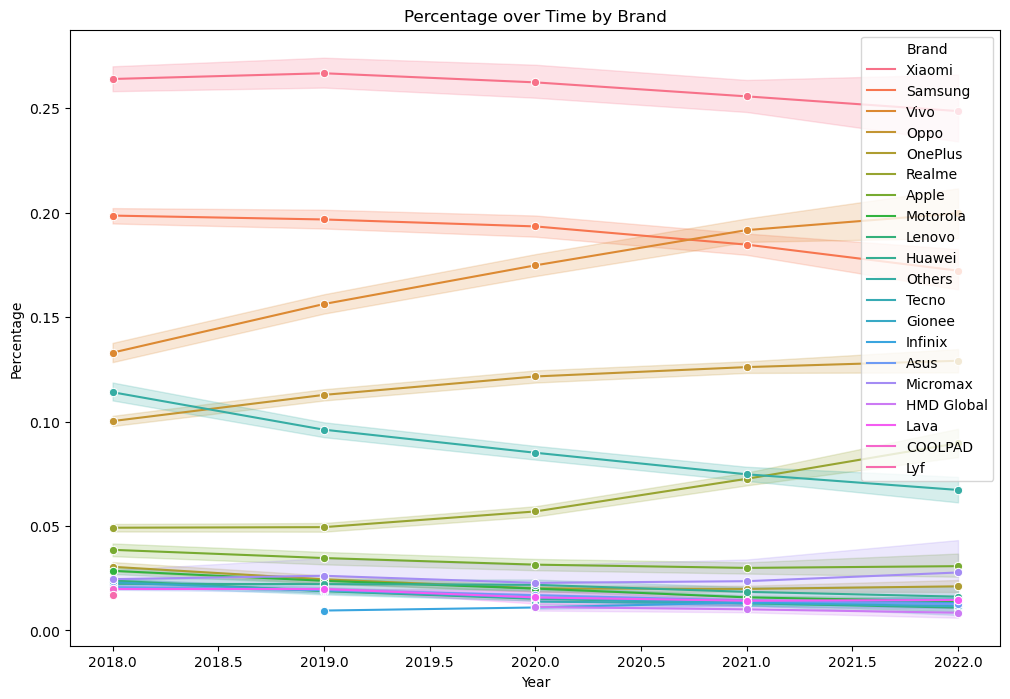

In [178]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=a_u, x='Year', y='Percentage', hue='Brand', marker='o')
plt.title('Percentage over Time by Brand')
plt.show()

map_transaction

In [184]:
m_t=pd.read_csv("pulse-master/tables/map_transaction.csv")

In [185]:
m_t

,State,Year,Quarter,District,Transaction_count,Transaction_amount
0,Andaman And Nicobar Islands,2018,1,North and Middle Andaman,442,9.316631e+05
1,Andaman And Nicobar Islands,2018,1,South Andaman,5688,1.256025e+07
2,Andaman And Nicobar Islands,2018,1,Nicobars,528,1.139849e+06
3,Andaman And Nicobar Islands,2018,2,North and Middle Andaman,825,1.317863e+06
4,Andaman And Nicobar Islands,2018,2,South Andaman,9395,2.394824e+07
...,...,...,...,...,...,...
18291,West Bengal,2024,1,Nadia,42154481,7.903014e+10
18292,West Bengal,2024,1,Birbhum,24812300,4.640025e+10
18293,West Bengal,2024,1,Purba Medinipur,46212626,9.237355e+10
18294,West Bengal,2024,1,Maldah,42299563,7.671603e+10


In [187]:
m_t.shape

(18296, 6)

In [188]:
m_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18296 entries, 0 to 18295
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               18296 non-null  object 
 1   Year                18296 non-null  int64  
 2   Quarter             18296 non-null  int64  
 3   District            18296 non-null  object 
 4   Transaction_count   18296 non-null  int64  
 5   Transaction_amount  18296 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 857.8+ KB


In [189]:
m_t.duplicated().sum()

0

In [190]:
m_t.describe()

,Year,Quarter,Transaction_count,Transaction_amount
count,18296.000000,18296.000000,1.829600e+04,1.829600e+04
mean,2020.640577,2.440151,8.593017e+06,1.341037e+10
std,1.808250,1.134239,3.755335e+07,4.954436e+10
min,2018.000000,1.000000,2.000000e+00,1.698886e+02
25%,2019.000000,1.000000,2.093415e+05,3.803883e+08
50%,2021.000000,2.000000,1.143285e+06,2.158772e+09
75%,2022.000000,3.000000,5.583417e+06,1.003906e+10
max,2024.000000,4.000000,1.410558e+09,1.753799e+12


In [192]:
m_t['Year'].unique()

array([2018, 2019, 2020, 2021, 2022, 2023, 2024], dtype=int64)

In [197]:

dis_data = m_t.groupby('District').agg(
    Transaction_count=('Transaction_count', 'sum'),
    Transaction_amount=('Transaction_amount', 'sum')
).reset_index()


In [198]:
dis_data

,District,Transaction_count,Transaction_amount
0,Adilabad,90217903,1.645294e+11
1,Agar Malwa,58227551,9.259312e+10
2,Agra,351338685,5.768199e+11
3,Ahmadabad,1347693757,2.202283e+12
4,Ahmednagar,807479961,1.307785e+12
...,...,...,...
718,Yamunanagar,54588200,1.005492e+11
719,Yanam,9523651,1.667534e+10
720,Yavatmal,190074917,2.829871e+11
721,Ysr,654173834,1.541158e+12


In [201]:

top_10_by_count = dis_data.sort_values(by='Transaction_count', ascending=False).head(10)




print(top_10_by_count)


               District  Transaction_count  Transaction_amount
72      Bengaluru Urban        12305160846        1.477074e+13
517                Pune         6854100535        7.448808e+12
248           Hyderabad         6303329211        1.018401e+13
256              Jaipur         4110791068        6.352222e+12
542          Rangareddy         3304425112        4.934054e+12
419  Medchal Malkajgiri         2655079187        3.949987e+12
697       Visakhapatnam         1872741016        3.227758e+12
86               Bhopal         1812393105        2.355911e+12
432     Mumbai Suburban         1801760139        2.301484e+12
334             Khordha         1789422727        2.331772e+12


In [202]:
top_10_by_amount = dis_data.sort_values(by='Transaction_amount', ascending=False).head(10)

print(top_10_by_amount)

               District  Transaction_count  Transaction_amount
72      Bengaluru Urban        12305160846        1.477074e+13
248           Hyderabad         6303329211        1.018401e+13
517                Pune         6854100535        7.448808e+12
256              Jaipur         4110791068        6.352222e+12
542          Rangareddy         3304425112        4.934054e+12
419  Medchal Malkajgiri         2655079187        3.949987e+12
697       Visakhapatnam         1872741016        3.227758e+12
360             Krishna         1343178177        2.639929e+12
500               Patna         1480550237        2.515930e+12
226              Guntur         1244235259        2.468675e+12


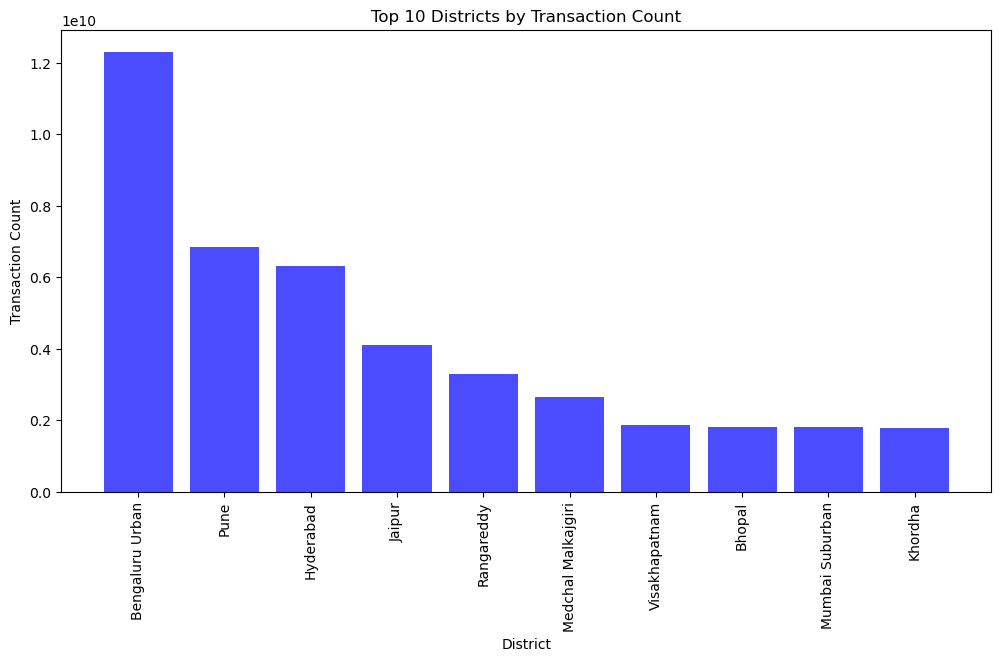

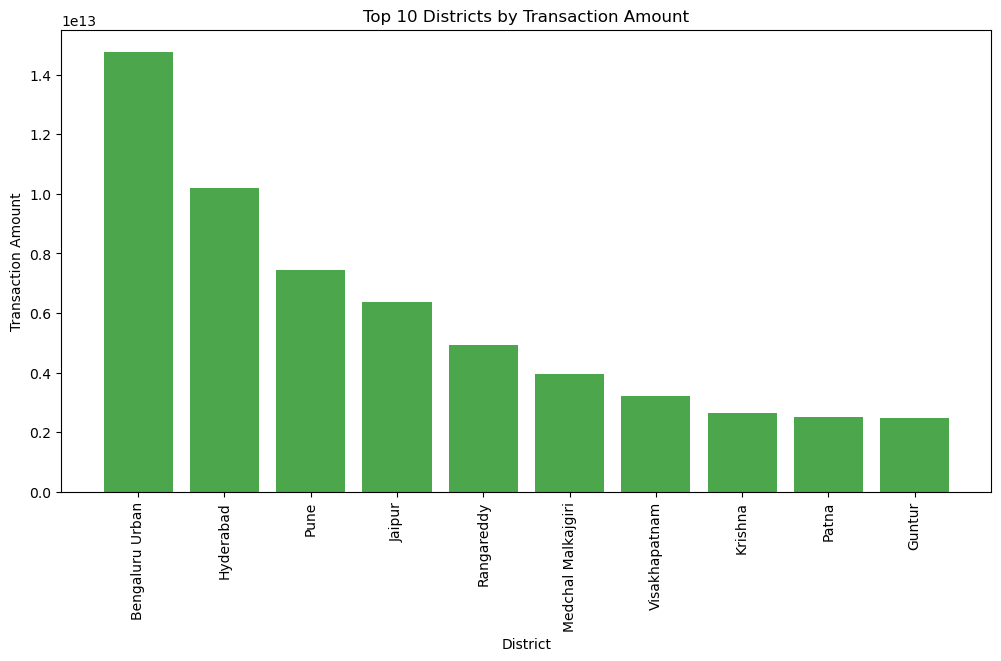

In [203]:

plt.figure(figsize=(12, 6))
plt.bar(top_10_by_count['District'], top_10_by_count['Transaction_count'], color='blue', alpha=0.7)
plt.xlabel('District')
plt.ylabel('Transaction Count')
plt.title('Top 10 Districts by Transaction Count')
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(12, 6))
plt.bar(top_10_by_amount['District'], top_10_by_amount['Transaction_amount'], color='green', alpha=0.7)
plt.xlabel('District')
plt.ylabel('Transaction Amount')
plt.title('Top 10 Districts by Transaction Amount')
plt.xticks(rotation=90)
plt.show()



map_user

In [204]:
m_u=pd.read_csv("pulse-master/tables/map_user.csv")

In [205]:
m_u

,State,Year,Quarter,District,Registered_users,App_opens
0,Andaman And Nicobar Islands,2018,1,North and Middle Andaman,632,0
1,Andaman And Nicobar Islands,2018,1,South Andaman,5846,0
2,Andaman And Nicobar Islands,2018,1,Nicobars,262,0
3,Andaman And Nicobar Islands,2018,2,North and Middle Andaman,911,0
4,Andaman And Nicobar Islands,2018,2,South Andaman,8143,0
...,...,...,...,...,...,...
18295,West Bengal,2024,1,Nadia,1671140,13679202
18296,West Bengal,2024,1,Birbhum,1056537,30502875
18297,West Bengal,2024,1,Purba Medinipur,1655920,18688405
18298,West Bengal,2024,1,Maldah,1183956,33270738


In [206]:
m_u.shape

(18300, 6)

In [207]:
m_u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18300 entries, 0 to 18299
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   State             18300 non-null  object
 1   Year              18300 non-null  int64 
 2   Quarter           18300 non-null  int64 
 3   District          18300 non-null  object
 4   Registered_users  18300 non-null  int64 
 5   App_opens         18300 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 857.9+ KB


In [208]:
m_u.duplicated().sum()

0

In [210]:
state_district_summary = m_u.groupby(['State', 'District']).agg(
    Total_Registered_Users=('Registered_users', 'sum'),
    Total_App_Opens=('App_opens', 'sum')
).reset_index()


In [211]:
state_district_summary

,State,District,Total_Registered_Users,Total_App_Opens
0,Andaman And Nicobar Islands,Nicobars,38582,26530285
1,Andaman And Nicobar Islands,North and Middle Andaman,187254,29651670
2,Andaman And Nicobar Islands,South Andaman,1152681,58738326
3,Andhra Pradesh,Anantapur,35203442,2079734993
4,Andhra Pradesh,Chittoor,44120759,2219670771
...,...,...,...,...
727,West Bengal,Purba Bardhaman,18731700,312468223
728,West Bengal,Purba Medinipur,22331419,361232727
729,West Bengal,Purulia,10420120,344727345
730,West Bengal,South Twenty Four Parganas,29918288,517421339


In [214]:
top_states_by_users = state_district_summary.groupby('State').agg(Total_Registered_Users=('Total_Registered_Users', 'sum')
).sort_values(by='Total_Registered_Users', ascending=False).head(10)

top_states_by_users


,Total_Registered_Users
State,
Maharashtra,928092054
Uttar Pradesh,745738884
Karnataka,597917586
Andhra Pradesh,462313673
Rajasthan,448589328
Telangana,429885251
West Bengal,424060952
Tamil Nadu,407736073
Madhya Pradesh,376698414


In [215]:
top_districts_by_users = state_district_summary.sort_values(by='Total_Registered_Users', ascending=False).head(10)
top_districts_by_users

,State,District,Total_Registered_Users,Total_App_Opens
273,Karnataka,Bengaluru Urban,249867846,7118443000
393,Maharashtra,Pune,162254617,4917095446
522,Rajasthan,Jaipur,101626061,2743188448
400,Maharashtra,Thane,100505125,1497504385
385,Maharashtra,Mumbai Suburban,98123191,1200948686
582,Telangana,Hyderabad,84011918,1966320839
156,Gujarat,Ahmadabad,76074295,1350619372
604,Telangana,Rangareddy,73171630,2396908130
183,Gujarat,Surat,62715762,971895975
724,West Bengal,North Twenty Four Parganas,62638095,853269293


In [216]:
top_states_by_opens = state_district_summary.groupby('State').agg(
    Total_App_Opens=('Total_App_Opens', 'sum')
).sort_values(by='Total_App_Opens', ascending=False).head(10)

top_states_by_opens


,Total_App_Opens
State,
Maharashtra,36596042578
Rajasthan,35445448146
Karnataka,30326543785
Madhya Pradesh,27024699519
Uttar Pradesh,22236837411
Andhra Pradesh,20139956812
Telangana,18778007792
Gujarat,13081911854
Tamil Nadu,12452978914


In [217]:
top_districts_by_opens = state_district_summary.sort_values(by='Total_App_Opens', ascending=False).head(10)
top_districts_by_opens 

,State,District,Total_Registered_Users,Total_App_Opens
273,Karnataka,Bengaluru Urban,249867846,7118443000
393,Maharashtra,Pune,162254617,4917095446
520,Rajasthan,Ganganagar,10763549,3909676535
522,Rajasthan,Jaipur,101626061,2743188448
510,Rajasthan,Barmer,11807949,2678223302
521,Rajasthan,Hanumangarh,7677543,2526493740
527,Rajasthan,Jodhpur,25978177,2513123238
389,Maharashtra,Nashik,51042657,2401759014
604,Telangana,Rangareddy,73171630,2396908130
513,Rajasthan,Bikaner,13881188,2318302757


Trends Over Time

In [218]:
trend_analysis = m_u.groupby(['Year', 'Quarter']).agg(
    Total_Registered_Users=('Registered_users', 'sum'),
    Total_App_Opens=('App_opens', 'sum')
).reset_index()

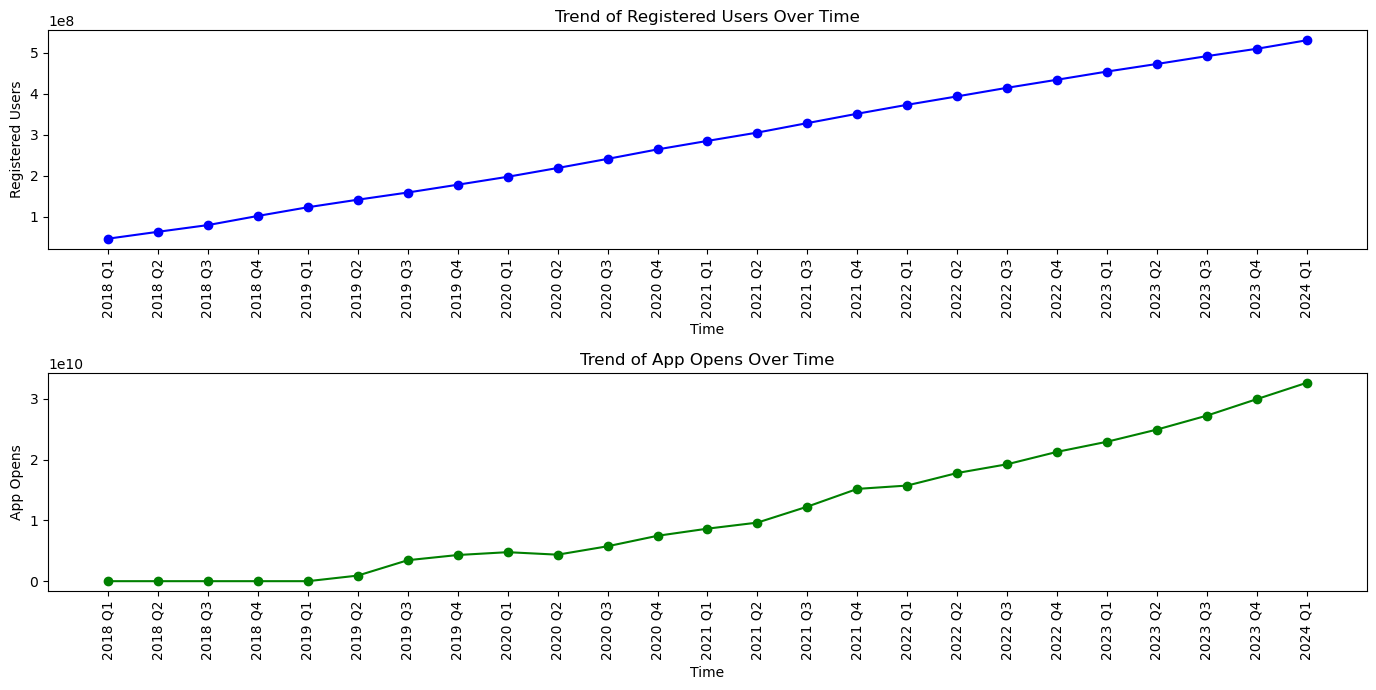

In [219]:


plt.figure(figsize=(14, 7))

# Plot Registered Users Trend
plt.subplot(2, 1, 1)
plt.plot(trend_analysis['Year'].astype(str) + ' Q' + trend_analysis['Quarter'].astype(str), trend_analysis['Total_Registered_Users'], marker='o', color='blue')
plt.xlabel('Time')
plt.ylabel('Registered Users')
plt.title('Trend of Registered Users Over Time')
plt.xticks(rotation=90)

# Plot App Opens Trend
plt.subplot(2, 1, 2)
plt.plot(trend_analysis['Year'].astype(str) + ' Q' + trend_analysis['Quarter'].astype(str), trend_analysis['Total_App_Opens'], marker='o', color='green')
plt.xlabel('Time')
plt.ylabel('App Opens')
plt.title('Trend of App Opens Over Time')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


User Engagement Metrics

In [220]:
m_u['Avg_App_Opens_Per_User'] = m_u['App_opens'] / m_u['Registered_users']


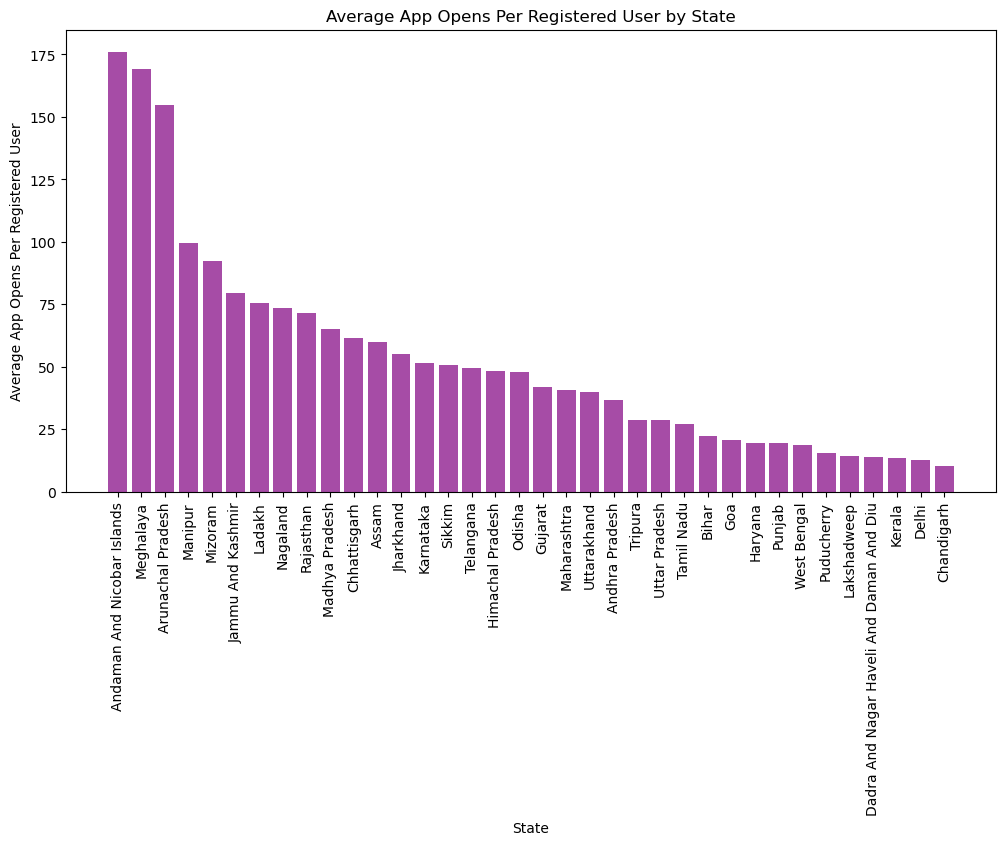

In [227]:
state_engagement = m_u.groupby('State').agg(
    Avg_App_Opens_Per_User=('Avg_App_Opens_Per_User', 'mean')
).reset_index().sort_values(by='Avg_App_Opens_Per_User', ascending=False)

#print(state_engagement)


plt.figure(figsize=(12, 6))
plt.bar(state_engagement['State'], state_engagement['Avg_App_Opens_Per_User'], color='purple', alpha=0.7)
plt.xlabel('State')
plt.ylabel('Average App Opens Per Registered User')
plt.title('Average App Opens Per Registered User by State')
plt.xticks(rotation=90)
plt.show()



In [231]:
district_engagement = m_u.groupby('District').agg(
    Avg_App_Opens_Per_User=('Avg_App_Opens_Per_User', 'mean')
).reset_index().sort_values(by='Avg_App_Opens_Per_User', ascending=False)
district_engagement

,District,Avg_App_Opens_Per_User
628,South West Khasi Hills,931.836646
577,Senapati,924.464017
436,Muzaffarabad,603.057482
299,Kamle,429.769567
465,Nicobars,406.704477
...,...,...
431,Mumbai,10.483640
655,Thiruvananthapuram,10.478425
115,Chandigarh,10.377800
8,Alappuzha,10.161508


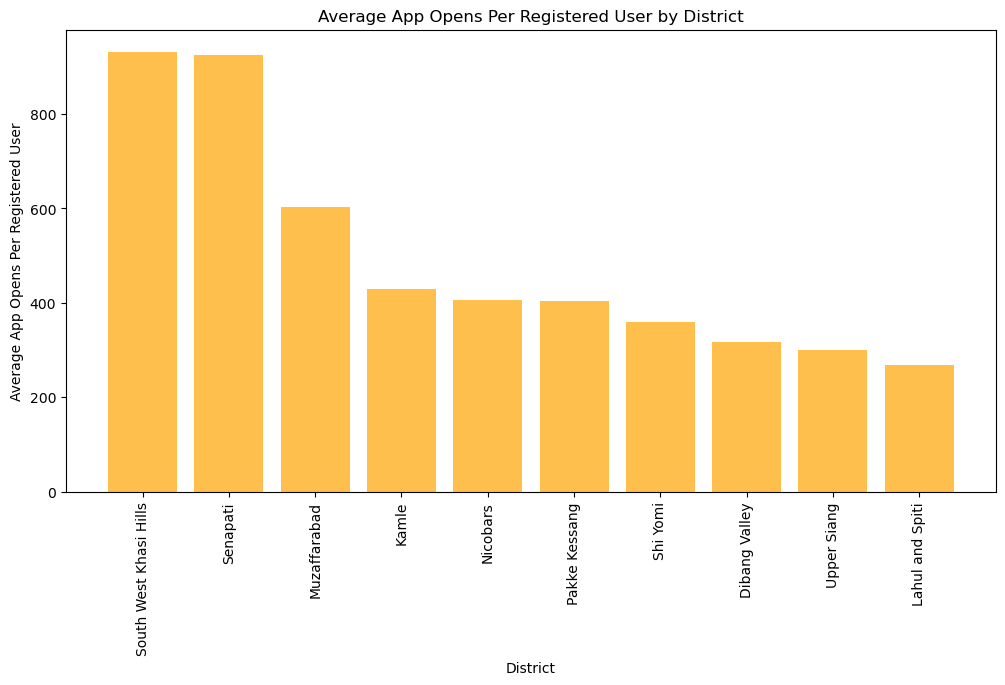

In [229]:
district_engagement = m_u.groupby('District').agg(
    Avg_App_Opens_Per_User=('Avg_App_Opens_Per_User', 'mean')
).reset_index().sort_values(by='Avg_App_Opens_Per_User', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(district_engagement['District'], district_engagement['Avg_App_Opens_Per_User'], color='orange', alpha=0.7)
plt.xlabel('District')
plt.ylabel('Average App Opens Per Registered User')
plt.title('Average App Opens Per Registered User by District')
plt.xticks(rotation=90)
plt.show()



In [233]:
time_engagement = m_u.groupby(['Year', 'Quarter']).agg(
    Avg_App_Opens_Per_User=('Avg_App_Opens_Per_User', 'mean')
).reset_index()



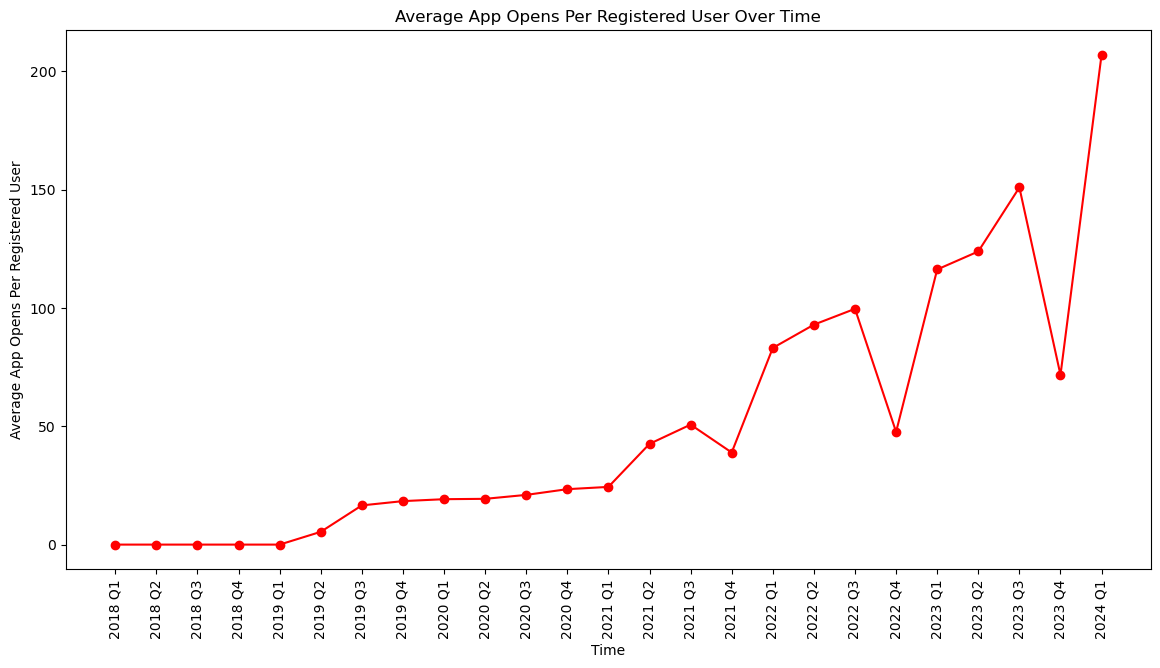

In [232]:
plt.figure(figsize=(14, 7))
plt.plot(time_engagement['Year'].astype(str) + ' Q' + time_engagement['Quarter'].astype(str), time_engagement['Avg_App_Opens_Per_User'], marker='o', color='red')
plt.xlabel('Time')
plt.ylabel('Average App Opens Per Registered User')
plt.title('Average App Opens Per Registered User Over Time')
plt.xticks(rotation=90)
plt.show()


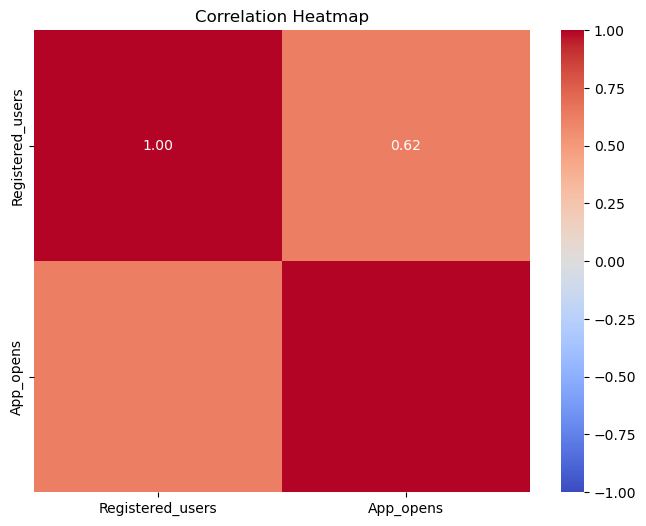

In [239]:
correlation = m_u[['Registered_users', 'App_opens']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', center=0, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()



top_transaction_district

In [240]:
ttd=pd.read_csv("pulse-master/tables/top_trans_dist.csv")

In [241]:
ttd

,State,Year,Quarter,District,Transaction_count,Transaction_amount
0,Andaman And Nicobar Islands,2018,1,South Andaman,5688,1.256025e+07
1,Andaman And Nicobar Islands,2018,1,Nicobars,528,1.139849e+06
2,Andaman And Nicobar Islands,2018,1,North and Middle Andaman,442,9.316631e+05
3,Andaman And Nicobar Islands,2018,2,South Andaman,9395,2.394824e+07
4,Andaman And Nicobar Islands,2018,2,Nicobars,1120,3.072437e+06
...,...,...,...,...,...,...
7395,West Bengal,2024,1,Maldah,42299563,7.671603e+10
7396,West Bengal,2024,1,Nadia,42154481,7.903014e+10
7397,West Bengal,2024,1,Howrah,41536962,7.516239e+10
7398,West Bengal,2024,1,Hooghly,40874089,7.131572e+10


In [242]:
ttp.shape

(5601, 6)

In [245]:
ttd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7400 entries, 0 to 7399
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               7400 non-null   object 
 1   Year                7400 non-null   int64  
 2   Quarter             7400 non-null   int64  
 3   District            7400 non-null   object 
 4   Transaction_count   7400 non-null   int64  
 5   Transaction_amount  7400 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 347.0+ KB


In [251]:
ttd.describe()


,Year,Quarter,Transaction_count,Transaction_amount
count,7400.000000,7400.000000,7.400000e+03,7.400000e+03
mean,2020.640000,2.440000,1.596546e+07,2.405290e+10
std,1.808547,1.134272,5.769603e+07,7.549618e+10
min,2018.000000,1.000000,4.420000e+02,5.471802e+05
25%,2019.000000,1.000000,2.332742e+05,4.381231e+08
50%,2021.000000,2.000000,1.855770e+06,3.131566e+09
75%,2022.000000,3.000000,1.107553e+07,1.873108e+10
max,2024.000000,4.000000,1.410558e+09,1.753799e+12


In [248]:
time_trends = ttd.groupby(['Year', 'Quarter']).agg(
    Total_Transaction_count=('Transaction_count', 'sum'),
    Total_Transaction_amount=('Transaction_amount', 'sum')
).reset_index()


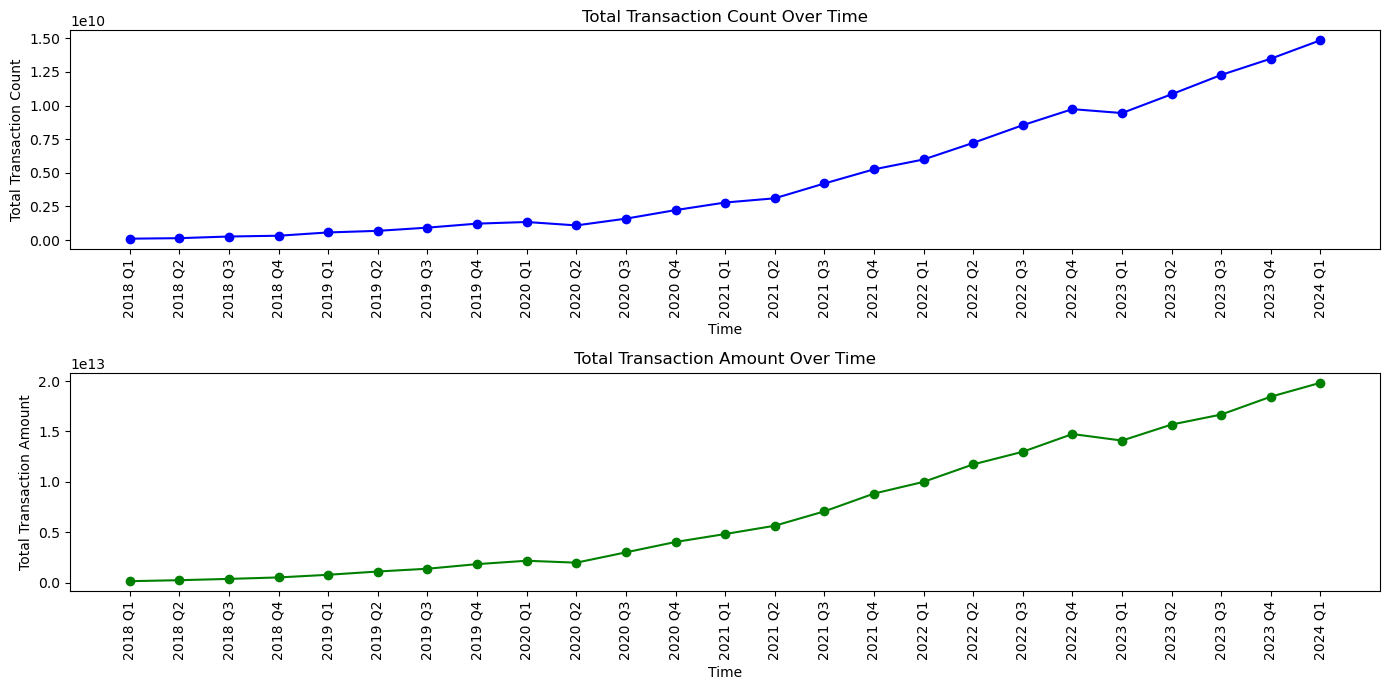

In [247]:


plt.figure(figsize=(14, 7))

# Plot Total Transaction Count Over Time
plt.subplot(2, 1, 1)
plt.plot(time_trends['Year'].astype(str) + ' Q' + time_trends['Quarter'].astype(str), time_trends['Total_Transaction_count'], marker='o', color='blue')
plt.xlabel('Time')
plt.ylabel('Total Transaction Count')
plt.title('Total Transaction Count Over Time')
plt.xticks(rotation=90)

# Plot Total Transaction Amount Over Time
plt.subplot(2, 1, 2)
plt.plot(time_trends['Year'].astype(str) + ' Q' + time_trends['Quarter'].astype(str), time_trends['Total_Transaction_amount'], marker='o', color='green')
plt.xlabel('Time')
plt.ylabel('Total Transaction Amount')
plt.title('Total Transaction Amount Over Time')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()
